# IAA Laboratori 9 - Laboratory Report

In [1]:
%pip install ucimlrepo
#%pip uninstall scikit-learn
%pip install scikit-learn==1.2.2


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cirrhosis_patient_survival_prediction = fetch_ucirepo(id=878) 
  
# data (as pandas dataframes) 
X = cirrhosis_patient_survival_prediction.data.original 
y = cirrhosis_patient_survival_prediction.data.targets 
  
# metadata 
print(cirrhosis_patient_survival_prediction.metadata) 
  
# variable information 
print(cirrhosis_patient_survival_prediction.variables) 

{'uci_id': 878, 'name': 'Cirrhosis Patient Survival Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1', 'data_url': 'https://archive.ics.uci.edu/static/public/878/data.csv', 'abstract': 'Utilize 17 clinical features for predicting survival state of patients with liver cirrhosis. The survival states include 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation).', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 418, 'num_features': 17, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Age', 'Sex'], 'target_col': ['Status'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5R02G', 'creators': ['E. Dickson', 'P. Grambsch', 'T. Fleming', 'L. Fisher', 'A. Langworthy'], 'intro_paper': {'title': 'Prognos

In [4]:
df = pd.DataFrame(X,  cirrhosis_patient_survival_prediction.original)


In [5]:
df.shape

(418, 20)

In [6]:
df.sample(10,random_state=42)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
321,322,2011,D,NaN,23376,F,NaN,NaN,NaN,N,1.1,NaN,3.69,NaN,NaN,NaN,NaN,139,10.5,NaN
324,325,4795,C,NaN,12419,F,NaN,NaN,NaN,N,1.8,NaN,3.24,NaN,NaN,NaN,NaN,NaN,18.0,2.0
388,389,1581,C,NaN,24472,F,NaN,NaN,NaN,N,0.7,NaN,3.06,NaN,NaN,NaN,NaN,165,10.0,4.0
56,57,3282,D,D-penicillamine,19567,F,N,Y,N,S,2.3,260,3.18,231,11320.2,105.78,94,216,12.4,3.0
153,154,140,D,D-penicillamine,25340,M,N,N,Y,Y,2.4,168,2.56,225,1056.0,120.90,75,108,14.1,3.0
30,31,3839,D,Placebo,15177,F,N,Y,N,N,4.7,296,3.44,114,9933.2,206.40,101,195,10.3,2.0
72,73,4190,C,Placebo,14060,F,N,N,N,N,0.7,132,3.60,17,423.0,49.60,56,265,11.0,1.0
82,83,4050,C,D-penicillamine,20459,F,N,Y,N,S,1.3,250,3.50,48,1138.0,71.30,100,81,12.9,4.0
258,259,1615,C,Placebo,21904,F,N,Y,N,N,3.1,277,2.97,42,1110.0,125.00,126,221,9.8,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269,10.4,3.0


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           313 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        313 non-null    object 
 7   Hepatomegaly   313 non-null    object 
 8   Spiders        313 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    312 non-null    object 
 12  Albumin        418 non-null    float64
 13  Copper         312 non-null    object 
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  312 non-null    object 
 17  Platelets      411 non-null    object 
 18  Prothrombi

In [8]:
unique_counts = pd.DataFrame.from_records([(col, df[col].nunique()) for col in df.columns],
                                         columns=['col_name', 'unique']).sort_values(by=['unique'])
unique_counts

,col_name,unique
5,Sex,2
3,Drug,3
6,Ascites,3
2,Status,3
7,Hepatomegaly,3
8,Spiders,3
9,Edema,3
19,Stage,4
18,Prothrombin,48
10,Bilirubin,98


## SECCIÓ 1

### Recodificació de les variables

En el següent tros de codi s'observa les categories de cada variable:

In [9]:
num_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(num_features))
print('*'*200)
print('Numerical Variables Column: ',num_features, '\n')

cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('*'*200)
print('Categorical variables column name:',cat_features)

Number of numerical variables:  9
********************************************************************************************************************************************************************************************************
Numerical Variables Column:  ['ID', 'N_Days', 'Age', 'Bilirubin', 'Albumin', 'Alk_Phos', 'SGOT', 'Prothrombin', 'Stage'] 

Number of categorical variables:  11
********************************************************************************************************************************************************************************************************
Categorical variables column name: ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Cholesterol', 'Copper', 'Tryglicerides', 'Platelets']


S'observa que hi ha variables mal interpretats, gràcies a l'anàlisi del metadata. Per tant, cal rectificar-los.

In [10]:
asnum = ['Cholesterol', 'Copper', 'Tryglicerides', 'Platelets']
ascat = ['Stage']

for var in asnum:
    df[var] = pd.to_numeric(df[var], errors='coerce')

for var in ascat:
    df[var] = df[var].astype('category') #.cat.set_categories(['0']).astype('object')



Comprovar que les variables són de la tipologia correcta

In [11]:
num_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
num_features.remove('Stage')
print('Number of numerical variables: ', len(num_features))
print('*'*200)
print('Numerical Variables Column: ',num_features, '\n')

cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
cat_features.append('Stage')
print('Number of categorical variables: ', len(cat_features))
print('*'*200)
print('Categorical variables column name:',cat_features)

Number of numerical variables:  12
********************************************************************************************************************************************************************************************************
Numerical Variables Column:  ['ID', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin'] 

Number of categorical variables:  8
********************************************************************************************************************************************************************************************************
Categorical variables column name: ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']


Hi ha missing codificats com 'NaNN'. També les recodifiquem

In [12]:
import numpy as np
df.Drug[df.Drug == 'NaNN'] = np.nan
df.Ascites[df.Ascites == 'NaNN'] = np.nan
df.Hepatomegaly[df.Hepatomegaly == 'NaNN'] = np.nan
df.Spiders[df.Spiders == 'NaNN'] = np.nan

/var/folders/sv/rjsj379n6s3dlghxjq1s54nh0000gn/T/ipykernel_90215/1271555788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Drug[df.Drug == 'NaNN'] = np.nan
/var/folders/sv/rjsj379n6s3dlghxjq1s54nh0000gn/T/ipykernel_90215/1271555788.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Ascites[df.Ascites == 'NaNN'] = np.nan
/var/folders/sv/rjsj379n6s3dlghxjq1s54nh0000gn/T/ipykernel_90215/1271555788.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

### Anàlisi estadístic de les variables

#### Taula de dades

Anàlisi de les variables numèriques 

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,418.0,209.500000,120.810458,1.00,105.2500,209.50,313.75,418.00
N_Days,418.0,1917.782297,1104.672992,41.00,1092.7500,1730.00,2613.50,4795.00
Age,418.0,18533.351675,3815.845055,9598.00,15644.5000,18628.00,21272.50,28650.00
Bilirubin,418.0,3.220813,4.407506,0.30,0.8000,1.40,3.40,28.00
Cholesterol,284.0,369.510563,231.944545,120.00,249.5000,309.50,400.00,1775.00
Albumin,418.0,3.497440,0.424972,1.96,3.2425,3.53,3.77,4.64
Copper,310.0,97.648387,85.613920,4.00,41.2500,73.00,123.00,588.00
Alk_Phos,312.0,1982.655769,2140.388824,289.00,871.5000,1259.00,1980.00,13862.40
SGOT,312.0,122.556346,56.699525,26.35,80.6000,114.70,151.90,457.25
Tryglicerides,282.0,124.702128,65.148639,33.00,84.2500,108.00,151.00,598.00


Anàlisi de les variables categòriques 

In [14]:
df.describe(exclude = ['float', 'int64']).T

,count,unique,top,freq
Status,418,3,C,232
Drug,312,2,D-penicillamine,158
Sex,418,2,F,374
Ascites,312,2,N,288
Hepatomegaly,312,2,Y,160
Spiders,312,2,N,222
Edema,418,3,N,354
Stage,412.0,4.0,3.0,155.0


#### Figura per variable

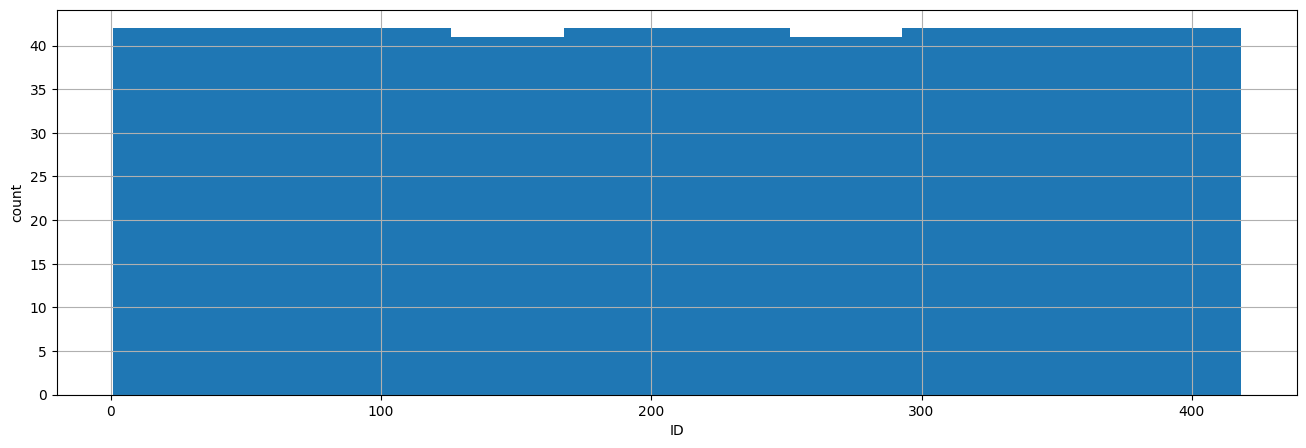

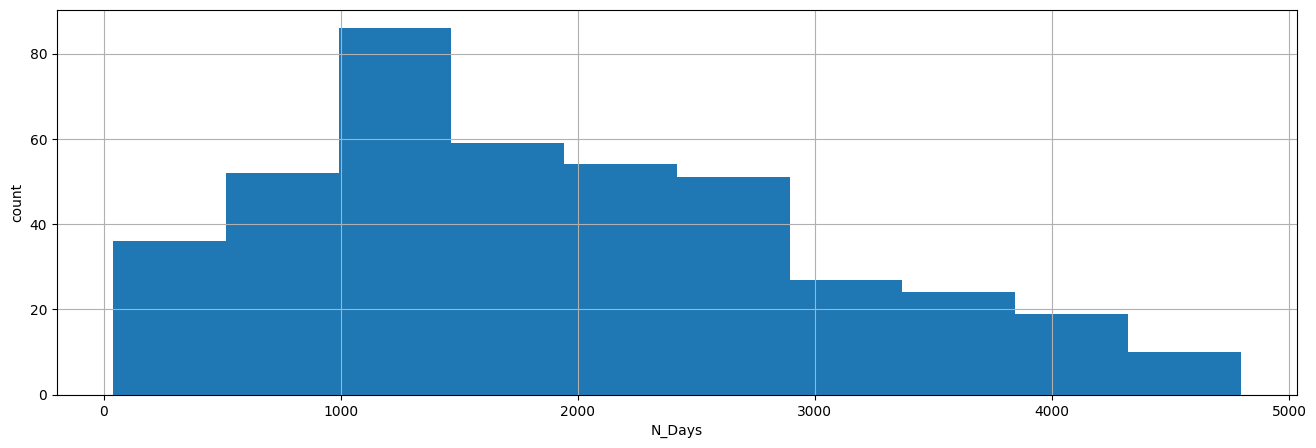

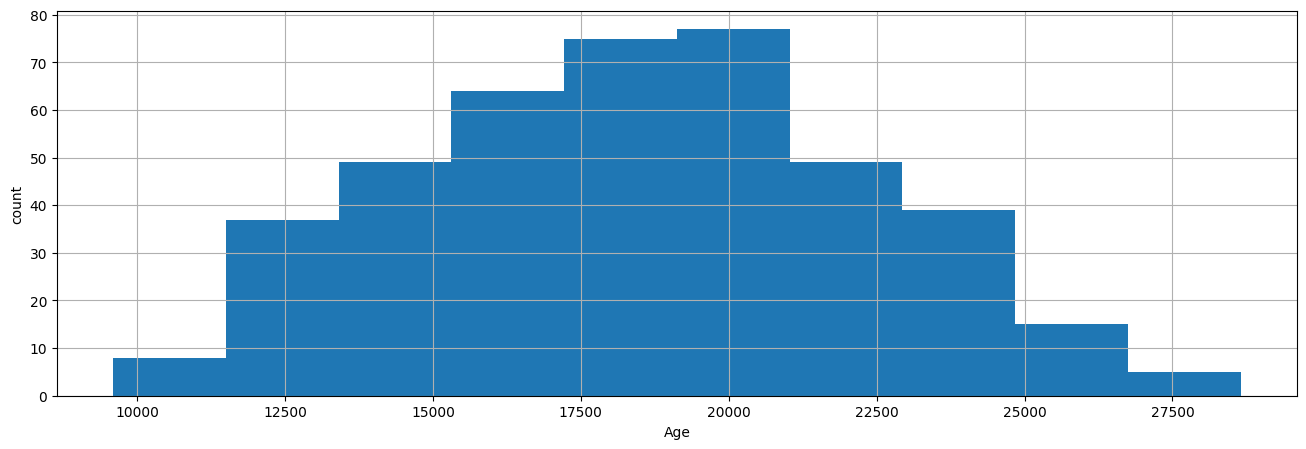

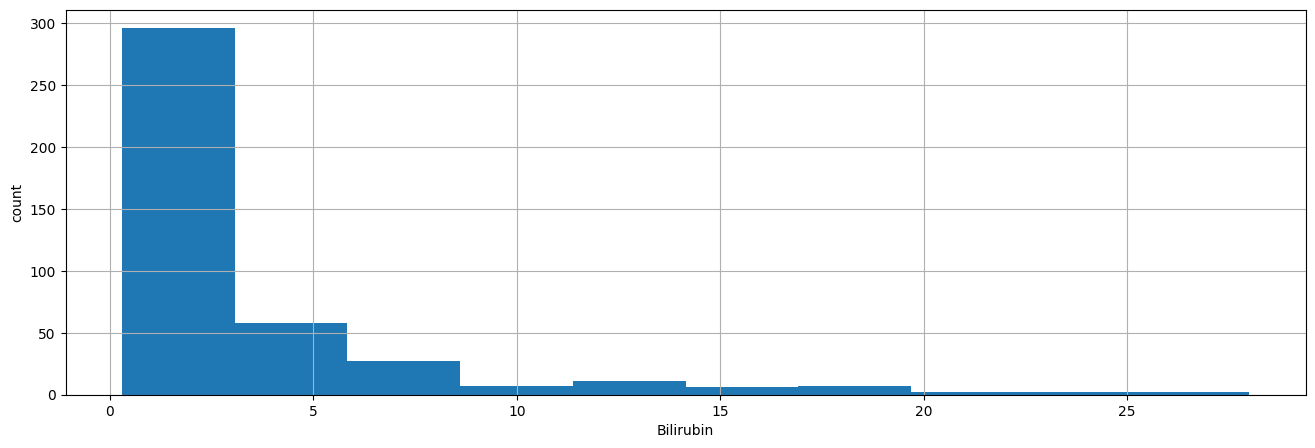

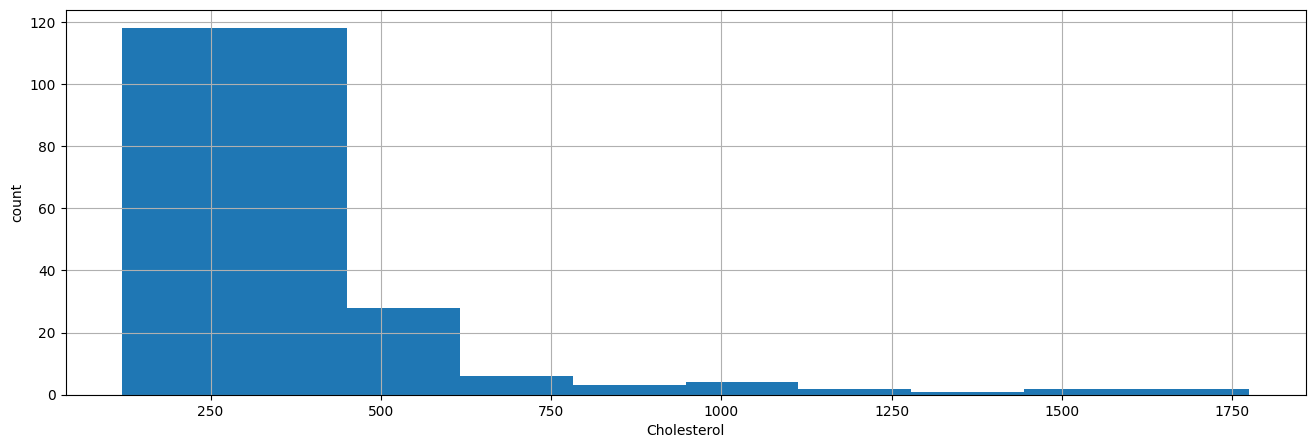

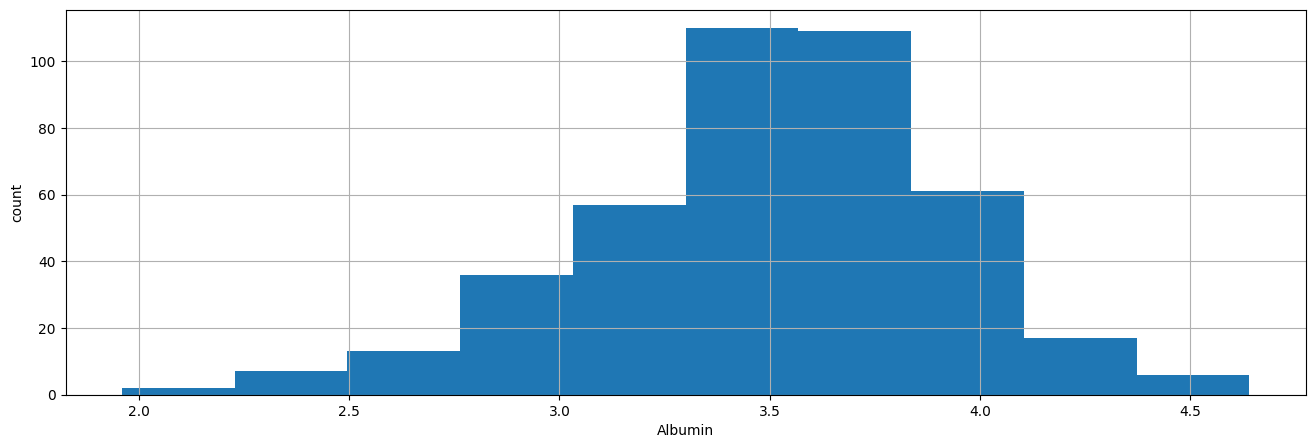

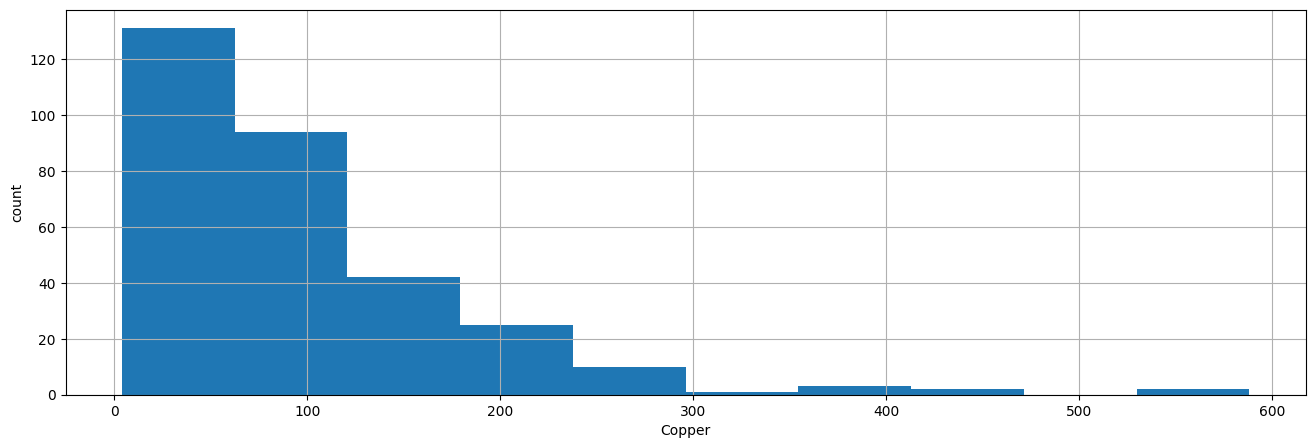

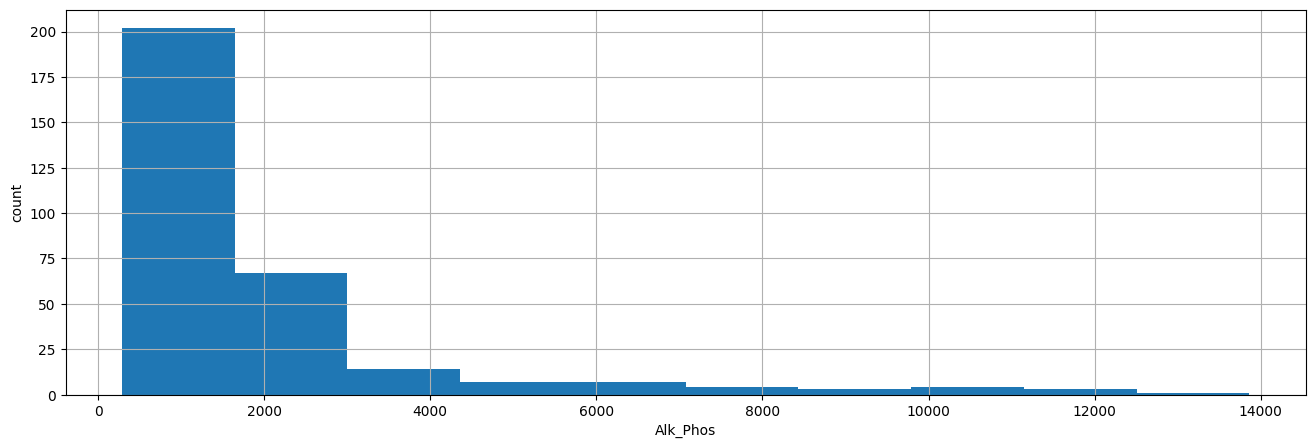

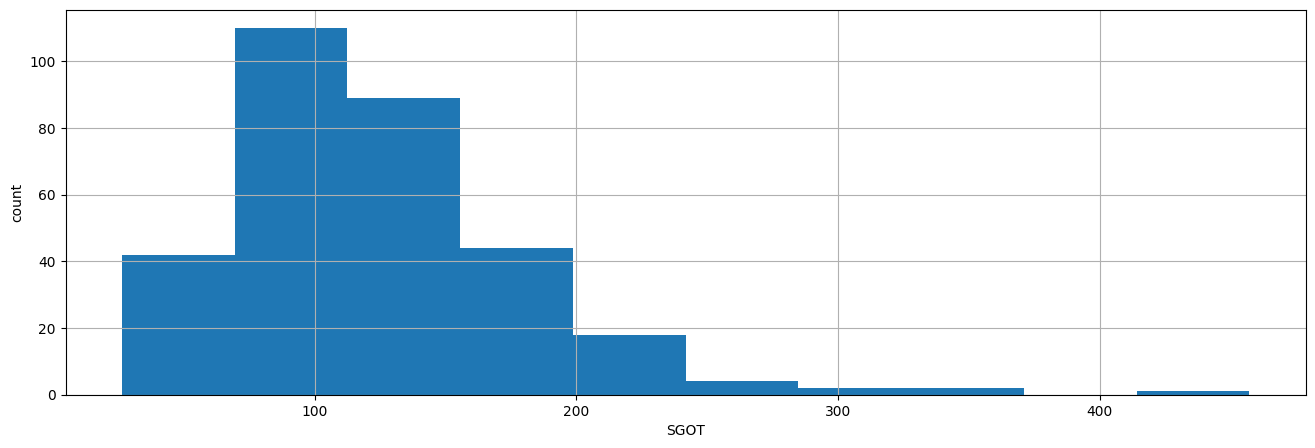

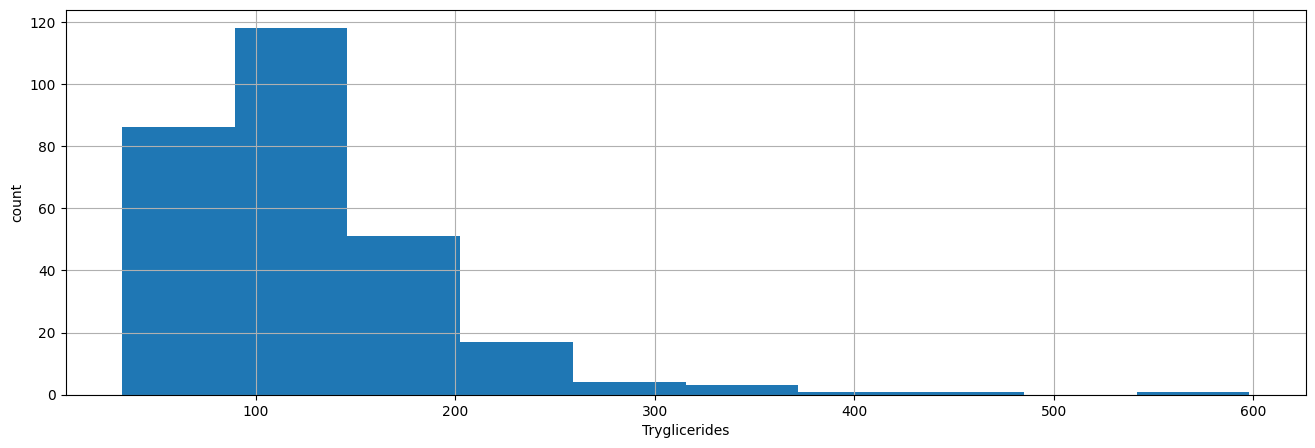

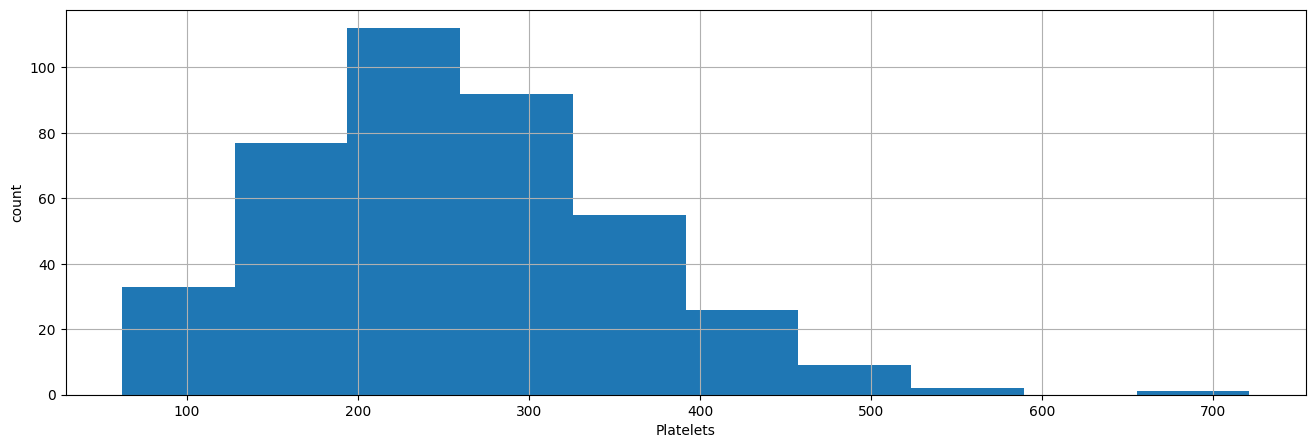

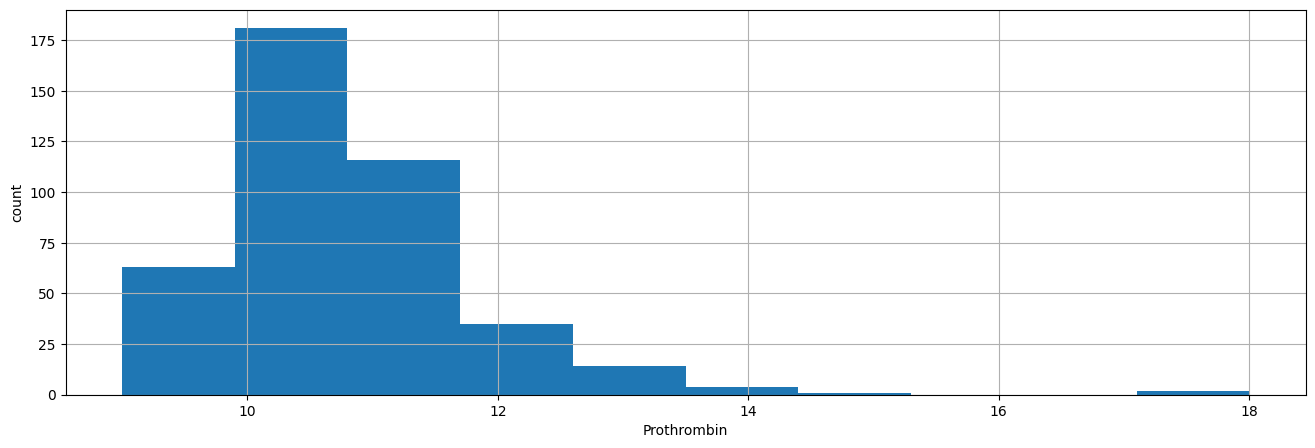

In [15]:
import matplotlib.pyplot as plt

for num_var in num_features:
    fig, axes= plt.subplots(1,1, figsize=(16,5))
    df[num_var].hist(ax=axes);
    plt.xlabel(num_var)
    plt.ylabel("count")


/var/folders/sv/rjsj379n6s3dlghxjq1s54nh0000gn/T/ipykernel_90215/206913569.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette='gist_rainbow_r')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/sv/rjsj379n6s3dlghxjq1s54nh0000gn/T/ipykernel_90215/206913569.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=col,palette='gist_rainbow_r')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/sv/rjsj379n6s3dlghxjq1s54nh0000gn

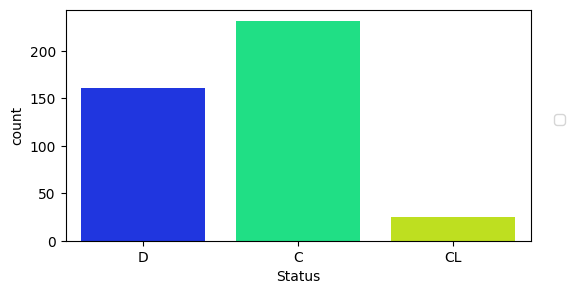

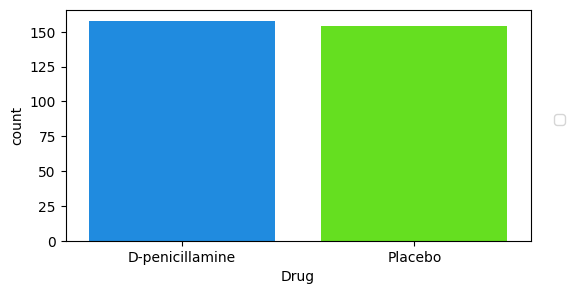

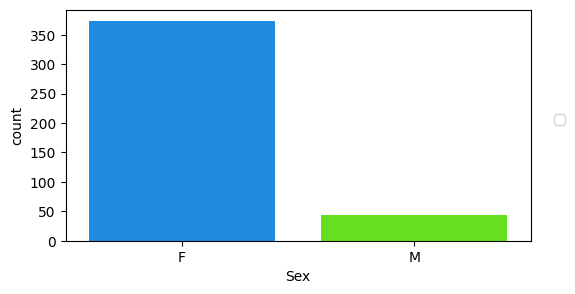

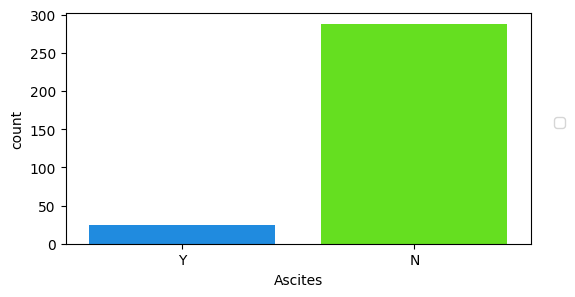

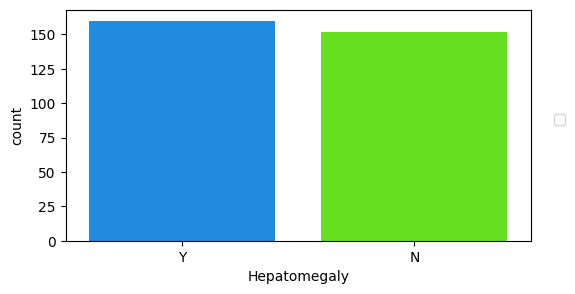

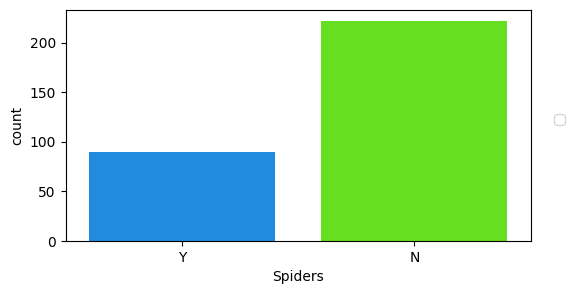

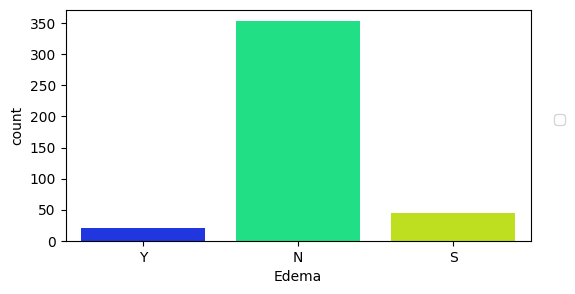

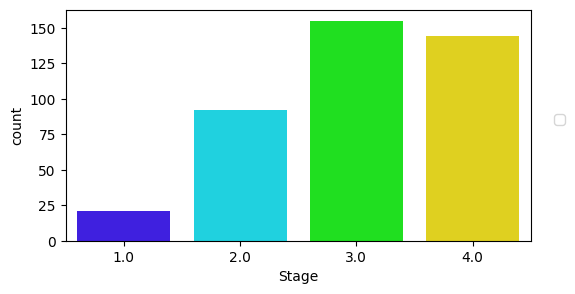

In [16]:
import seaborn as sns
for col in cat_features[:]:
    plt.figure(figsize=(6,3), dpi=100)
    sns.countplot(data=df,x=col,palette='gist_rainbow_r')
    plt.legend(loc=(1.05,0.5))

### Estudi dels outliers

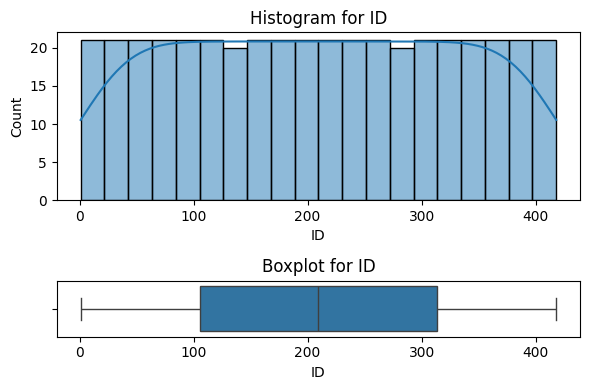

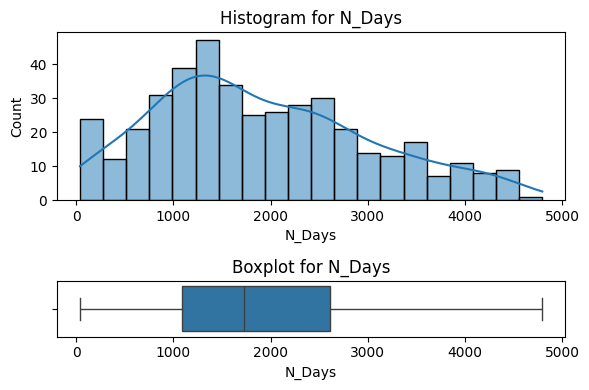

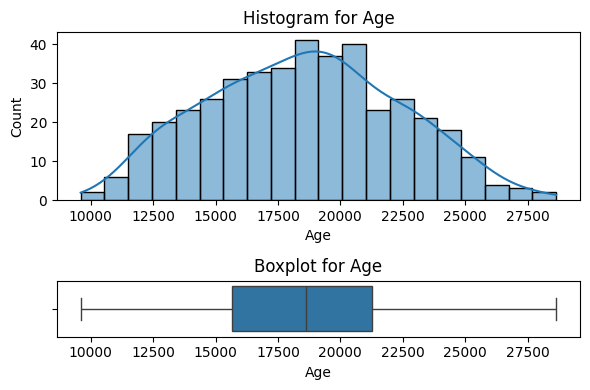

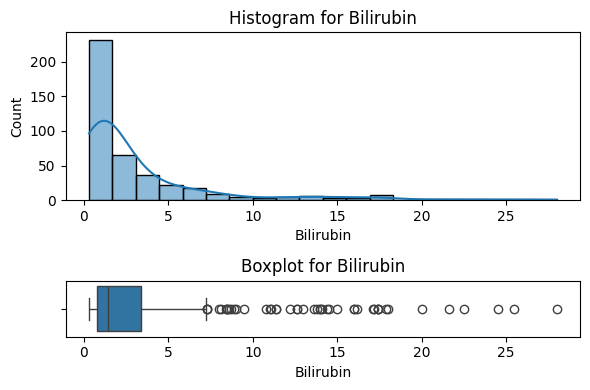

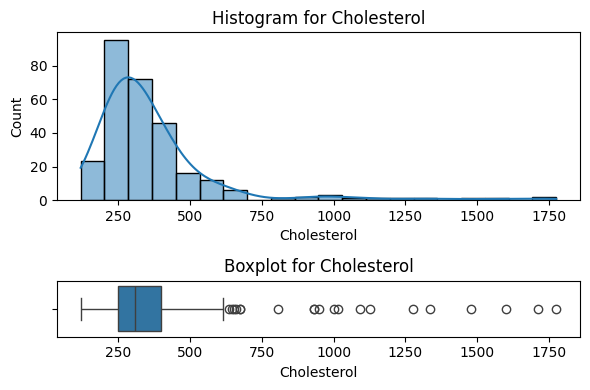

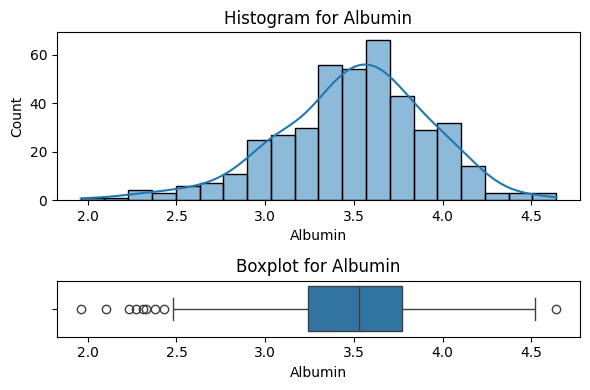

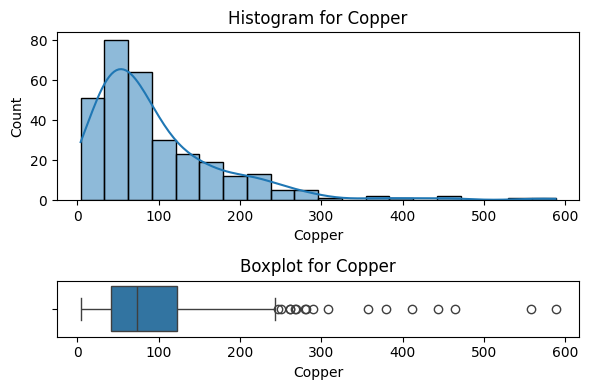

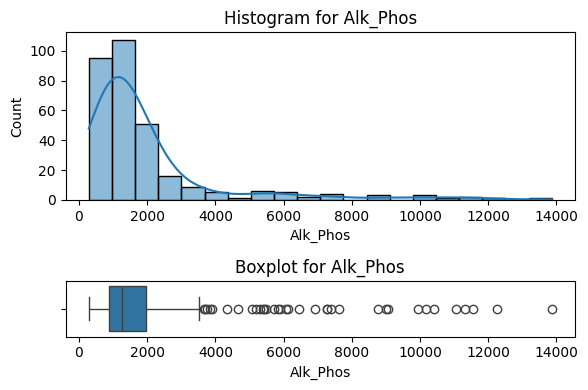

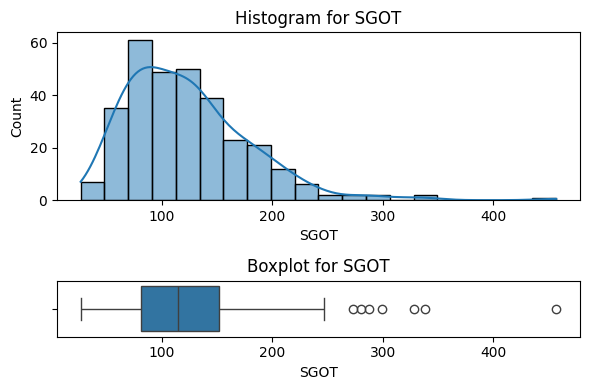

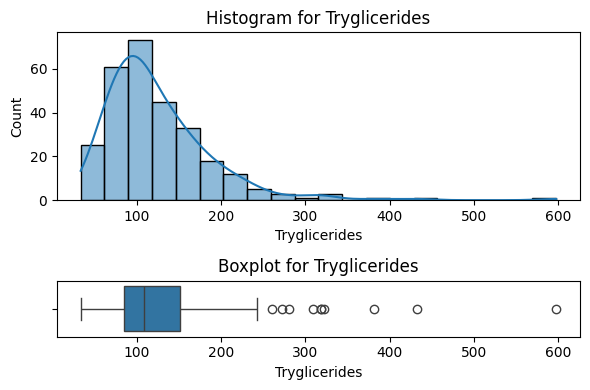

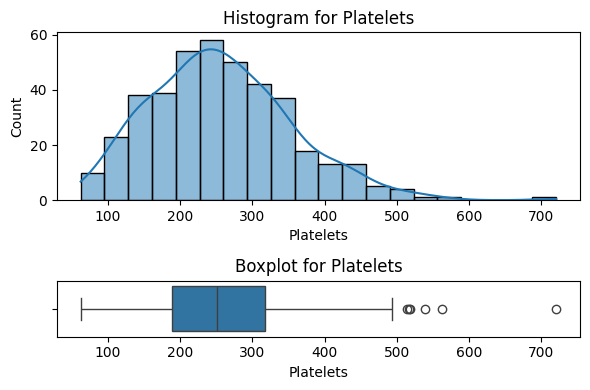

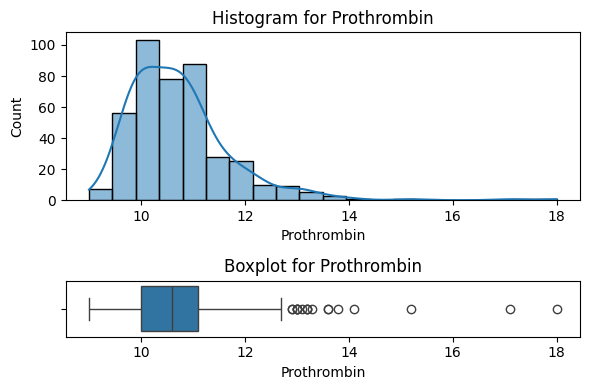

In [17]:
for i, col in enumerate(num_features):
        fig, axes = plt.subplots(2,1,figsize=(6,4), height_ratios=(3,1))
        sns.histplot(data=df[col], bins=20, ax=axes[0], kde=True)
        axes[0].set_xlabel(col) 
        axes[0].set_ylabel('Count') 
        axes[0].set_title(f'Histogram for {col}')  
        sns.boxplot(data=df[col], ax=axes[1], orient='h')
        axes[1].set_title(f'Boxplot for {col}')  

        plt.tight_layout()

In [18]:
for i, col in enumerate(num_features):
    print('small outliers i big outliers de',col)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    small_outliers = df[col] < (Q1 - 1.5 * IQR)
    big_outliers = df[col] > (Q3 + 1.5 * IQR)

    print(sum(small_outliers), sum(big_outliers))

small outliers i big outliers de ID
0 0
small outliers i big outliers de N_Days
0 0
small outliers i big outliers de Age
0 0
small outliers i big outliers de Bilirubin
0 46
small outliers i big outliers de Cholesterol
0 20
small outliers i big outliers de Albumin
8 1
small outliers i big outliers de Copper
0 17
small outliers i big outliers de Alk_Phos
0 35
small outliers i big outliers de SGOT
0 7
small outliers i big outliers de Tryglicerides
0 10
small outliers i big outliers de Platelets
0 6
small outliers i big outliers de Prothrombin
0 18


In [19]:
def plot_with_without_outliers(df, col, threshold=1.5):
    fig, axes = plt.subplots(2,2,figsize=(12,4), height_ratios=(3,1))
    data_to_plot = df[col]
    sns.histplot(data=data_to_plot, bins=20, ax=axes[0,0], kde=True)
    axes[0, 0].set_xlabel(col)
    axes[0, 0].set_ylabel('Count')
    axes[0, 0].set_title(f'Histogram for {col} with outliers')
    sns.boxplot(data=df[col], ax=axes[1,0], orient='h')
    axes[1, 0].set_title(f'Boxplot for {col} with outliers')

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    data_without_outliers = df[(df[col] >= Q1 - threshold * IQR) & (df[col] <= Q3 + threshold * IQR)][col]
    sns.histplot(data=data_without_outliers, bins=20, ax=axes[0, 1], kde=True)
    axes[0, 1].set_xlabel(col)
    axes[0, 1].set_ylabel('Count')
    axes[0, 1].set_title(f'Histogram for {col} without outliers')
    sns.boxplot(data=pd.DataFrame(data_without_outliers), ax=axes[1, 1], orient='h')
    axes[1, 1].set_title(f'Boxplot for {col} without outliers')
    plt.tight_layout()


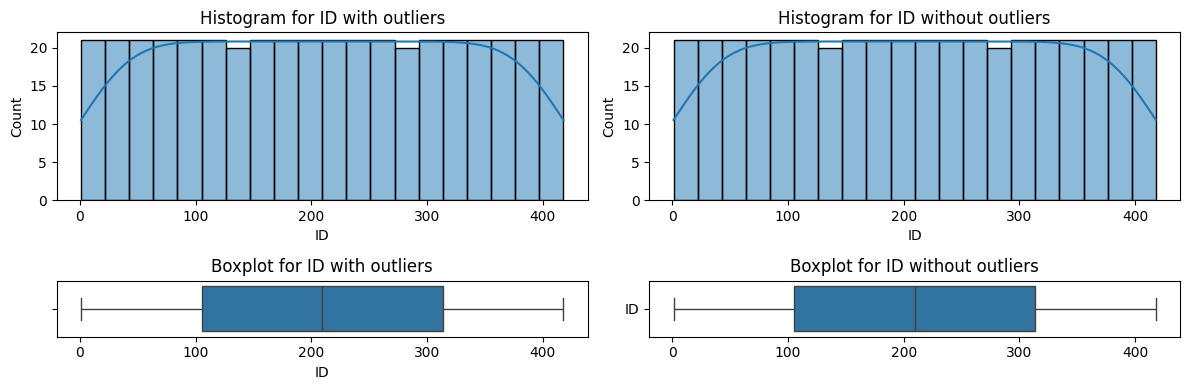

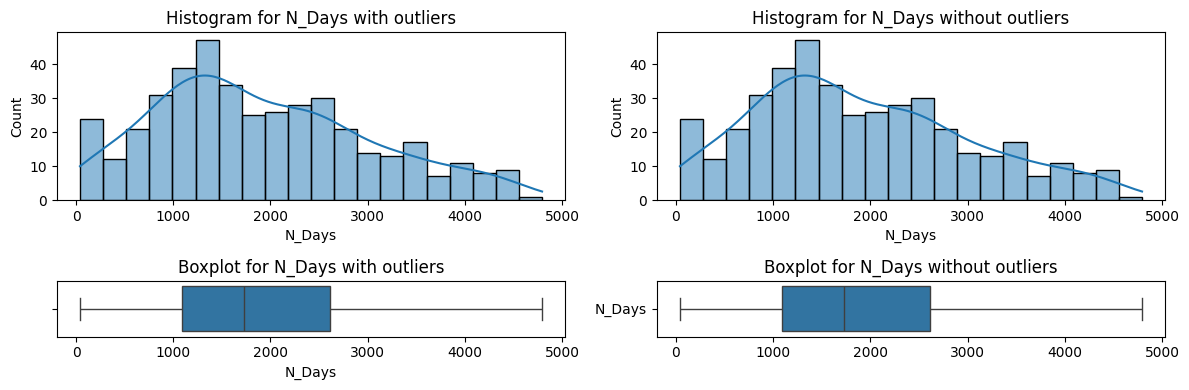

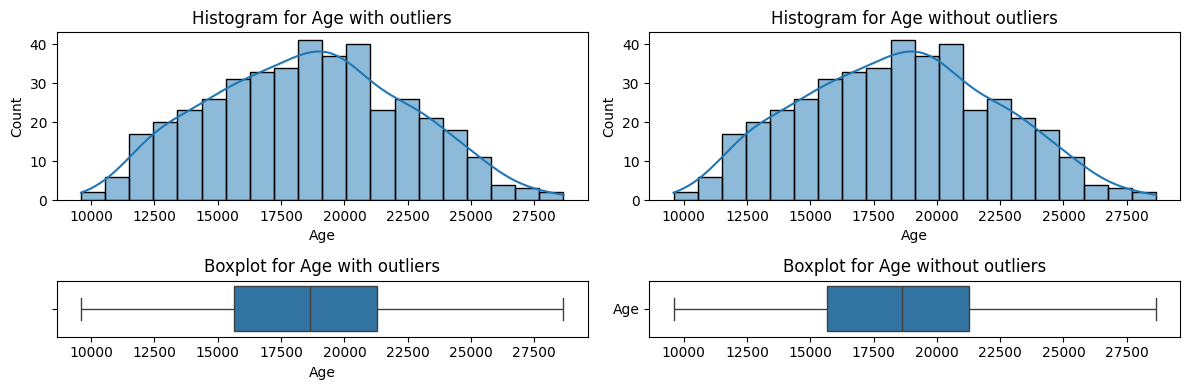

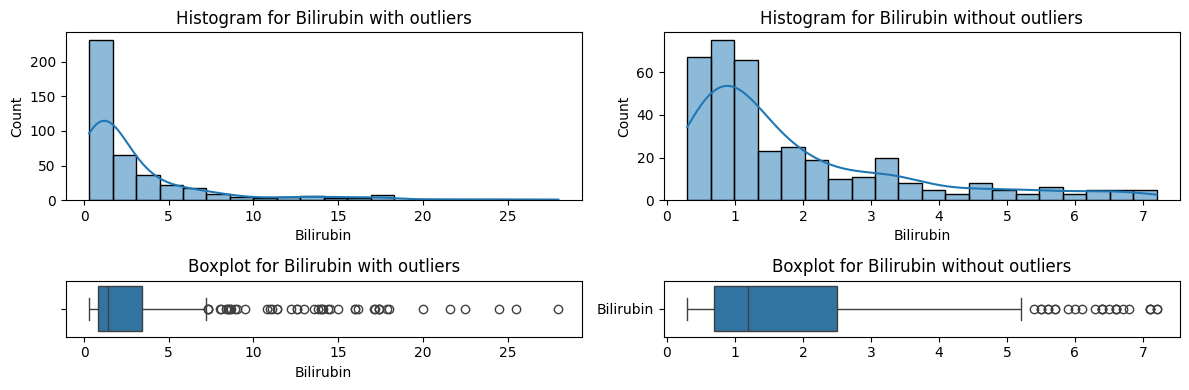

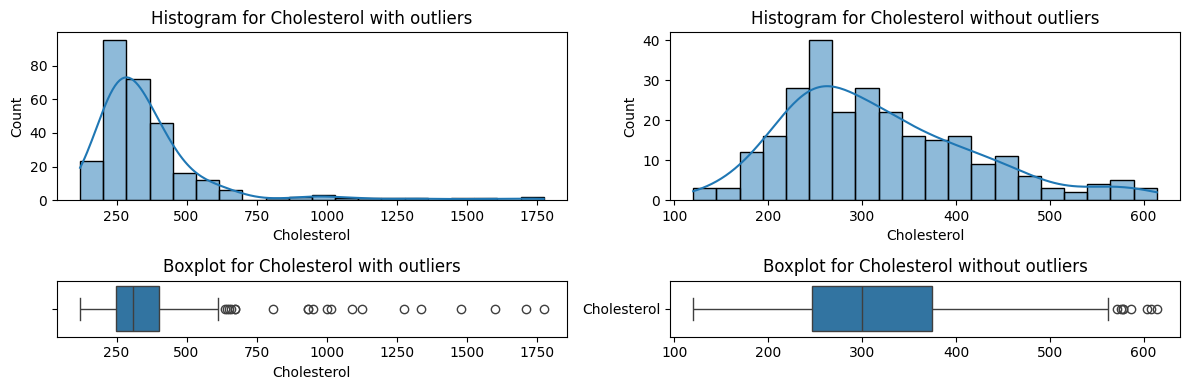

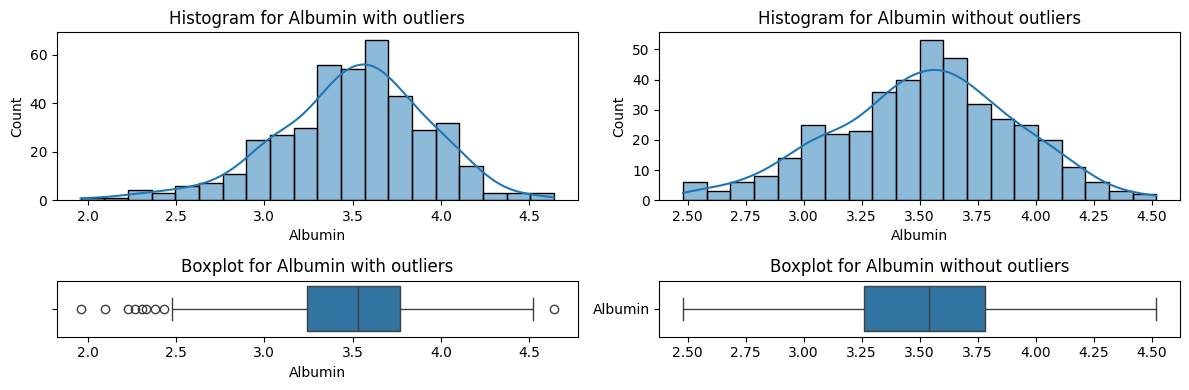

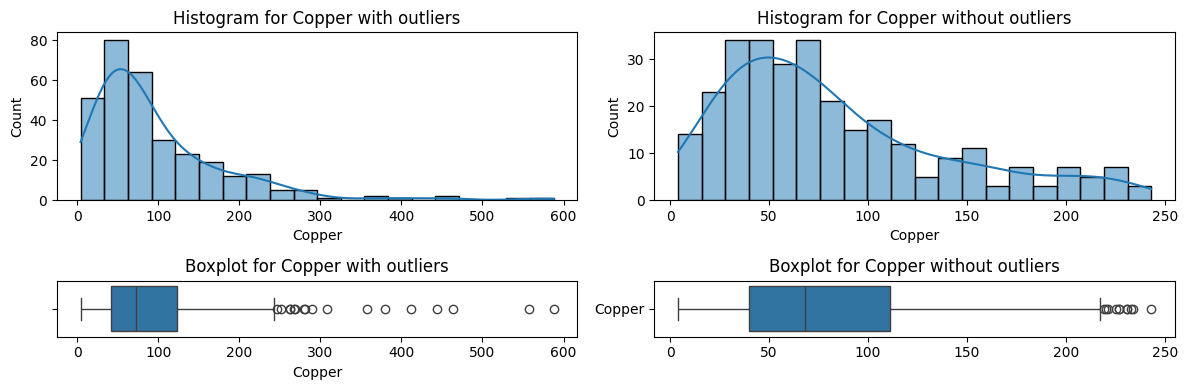

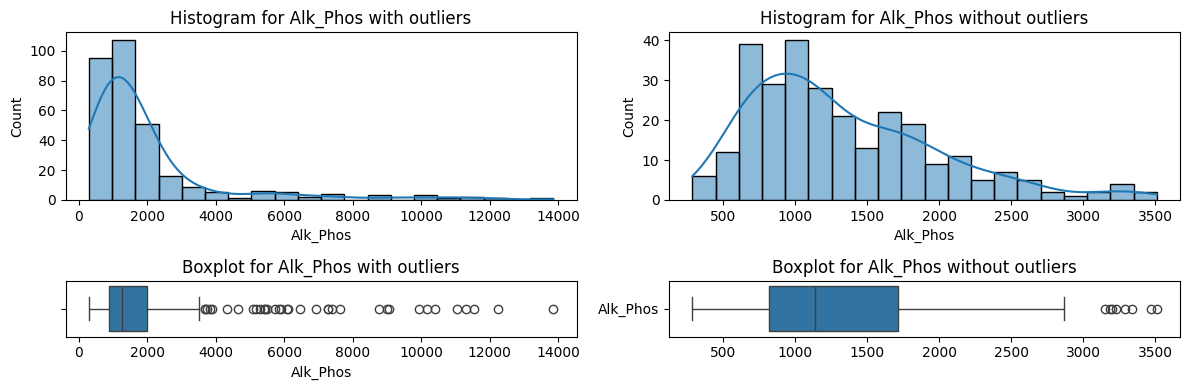

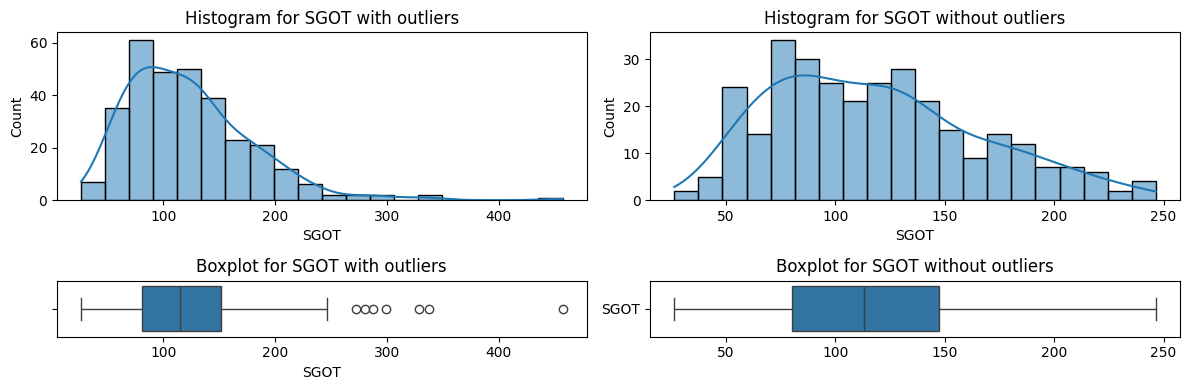

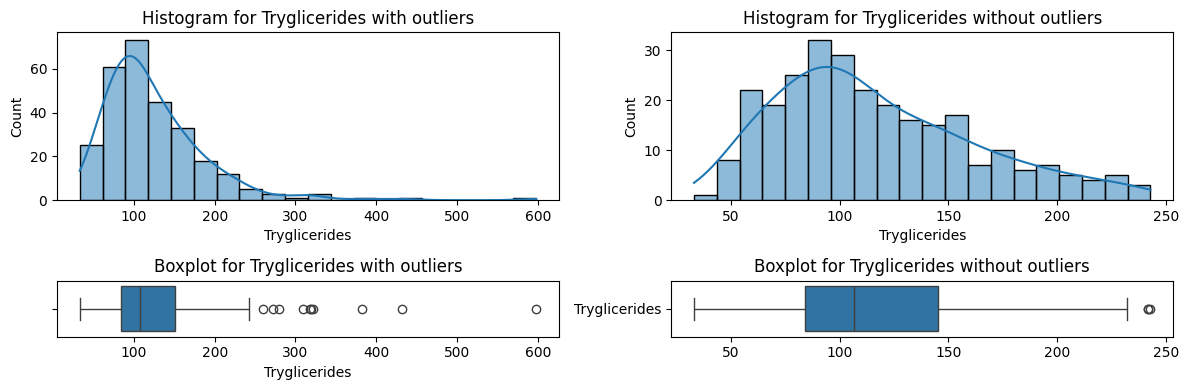

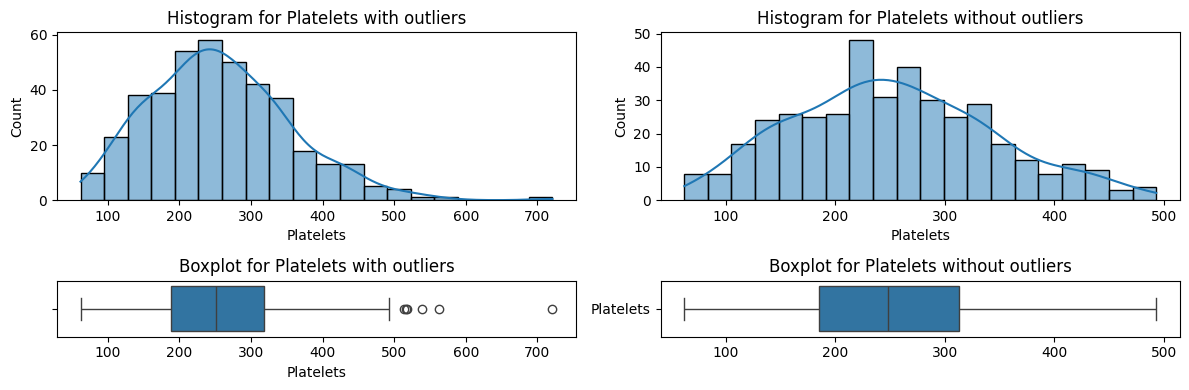

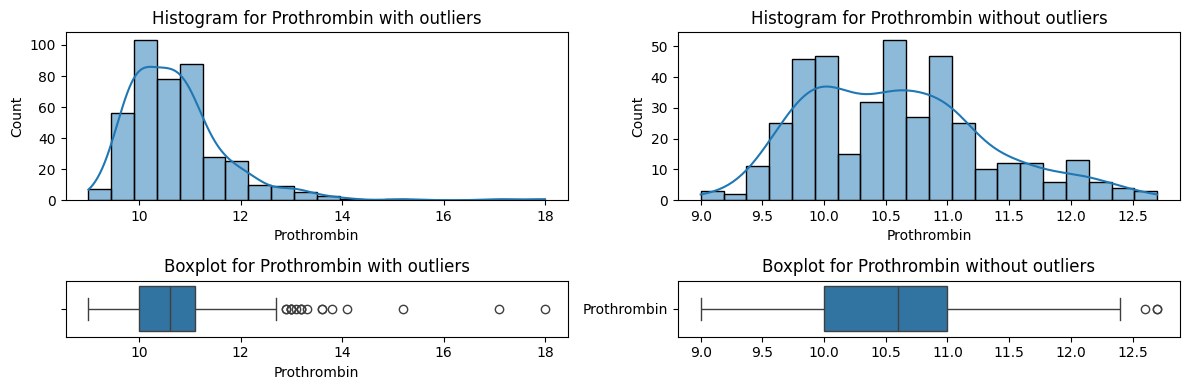

In [20]:
for col in num_features:
    plot_with_without_outliers(df, col, 1.5)

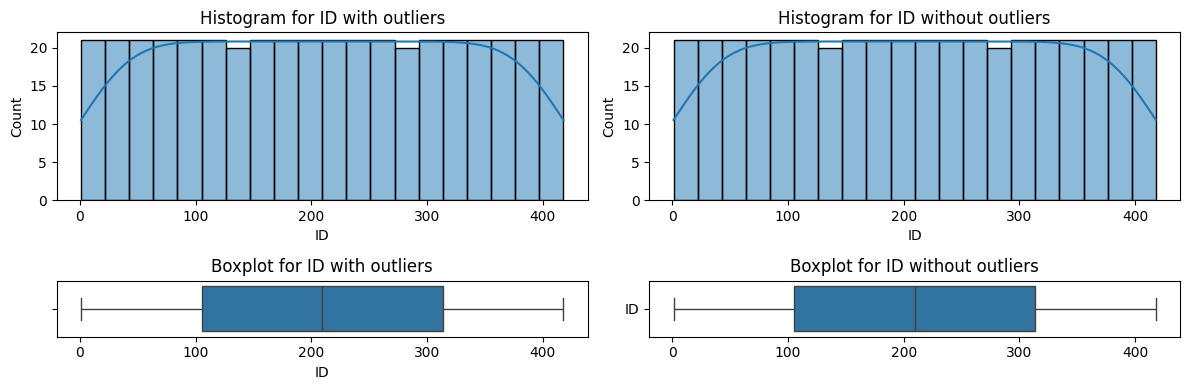

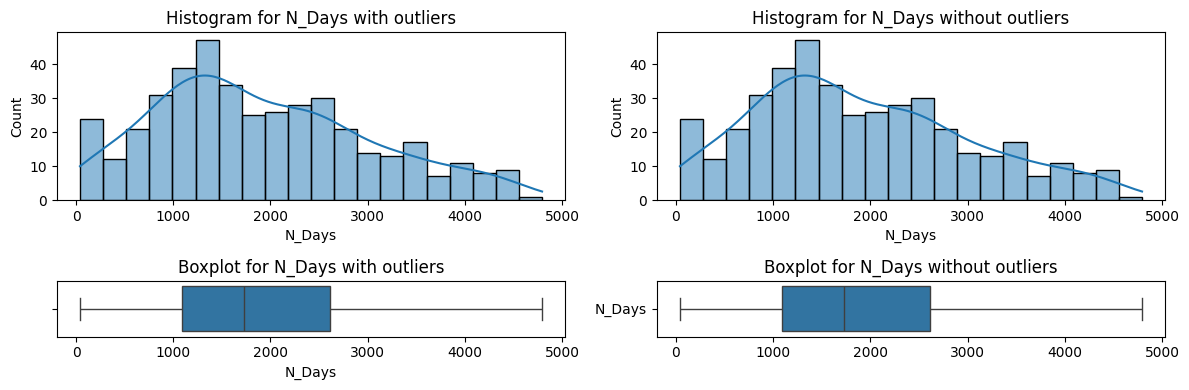

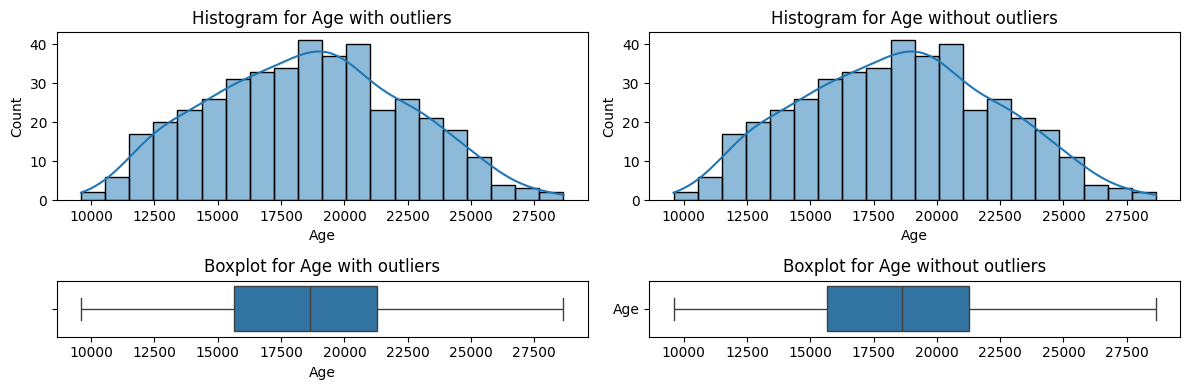

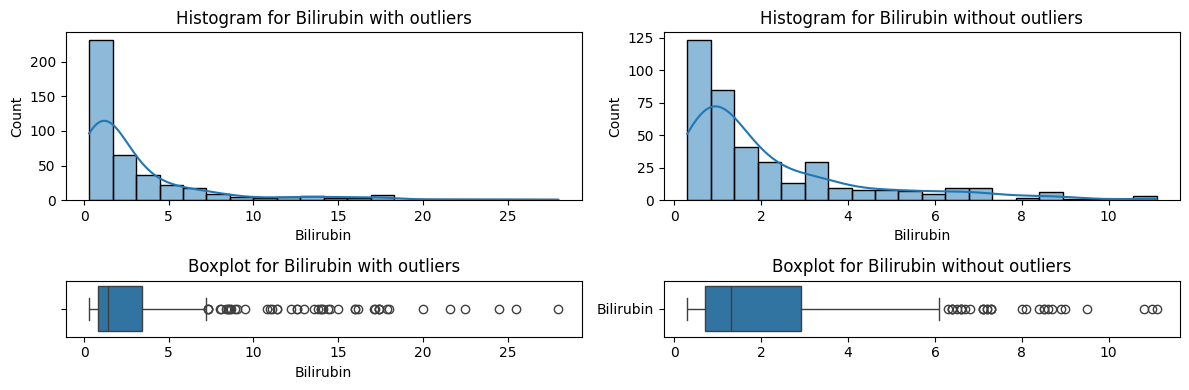

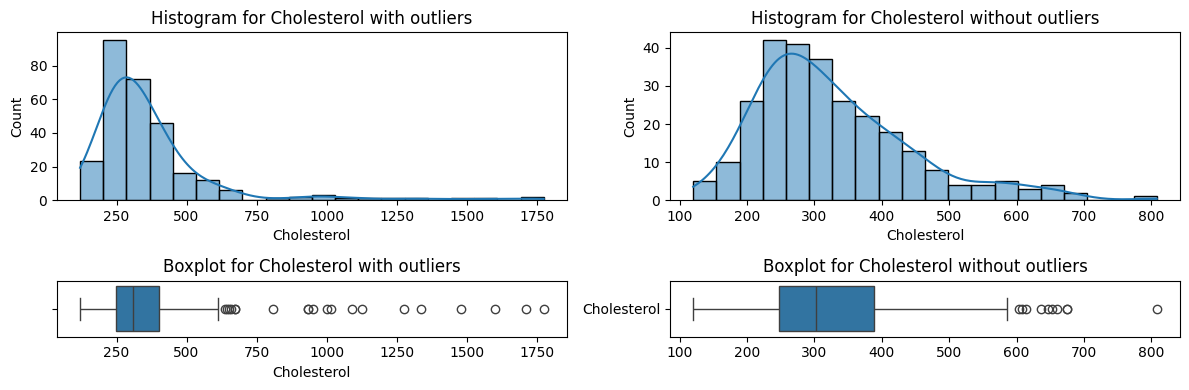

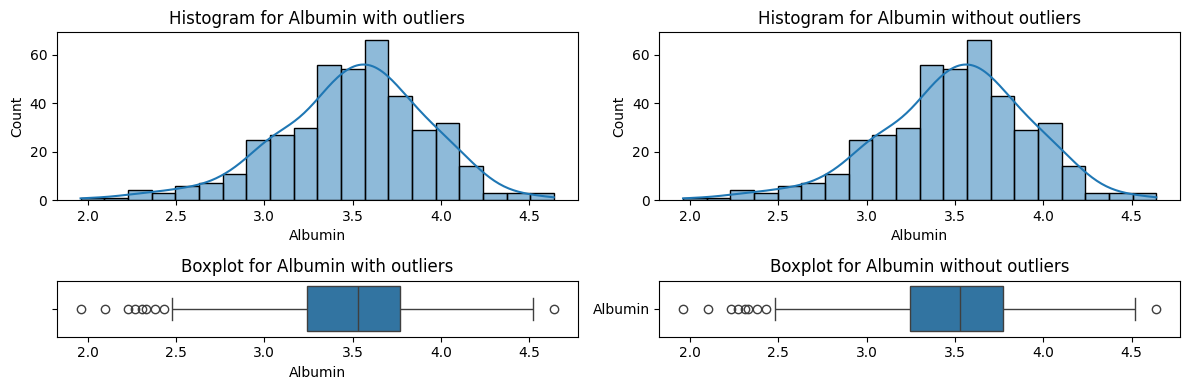

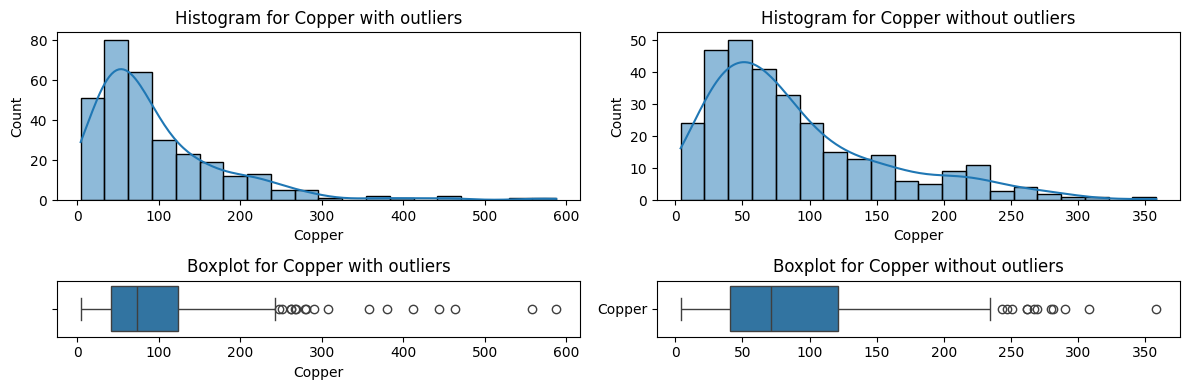

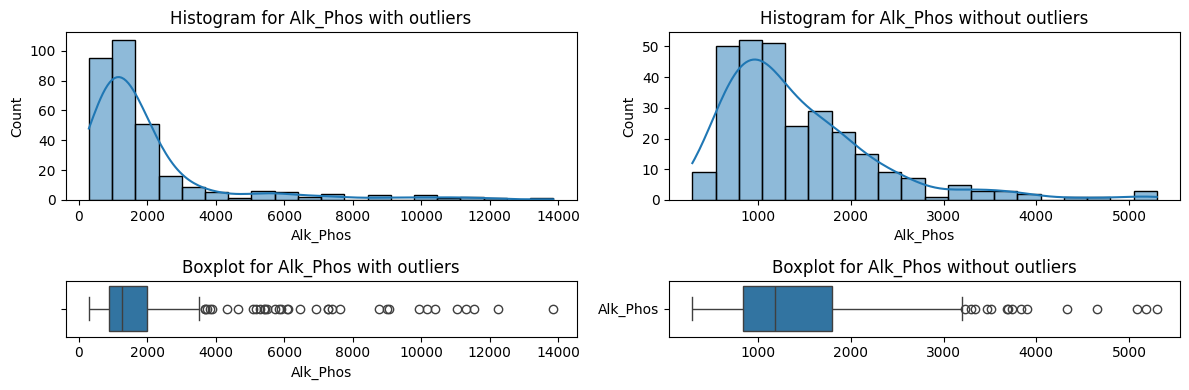

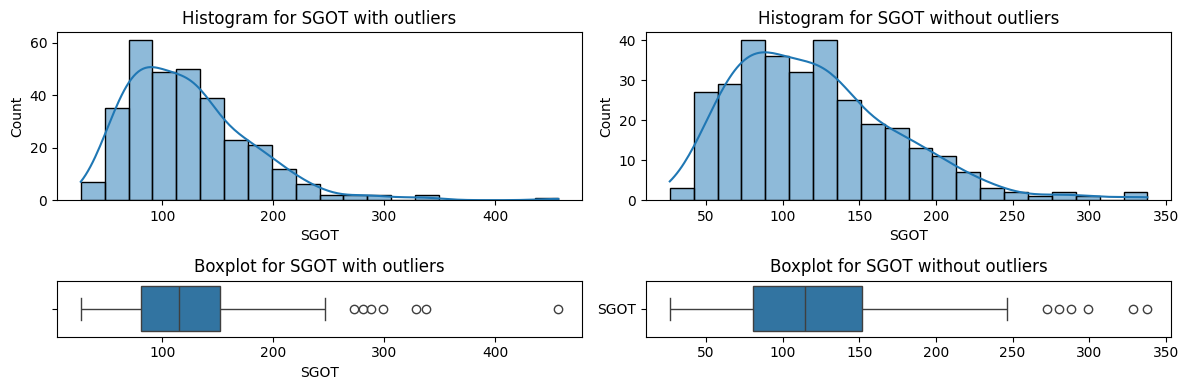

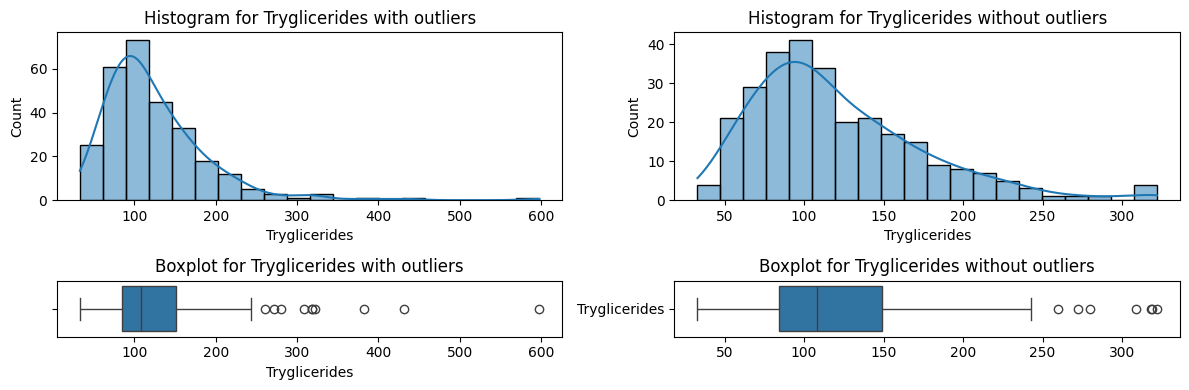

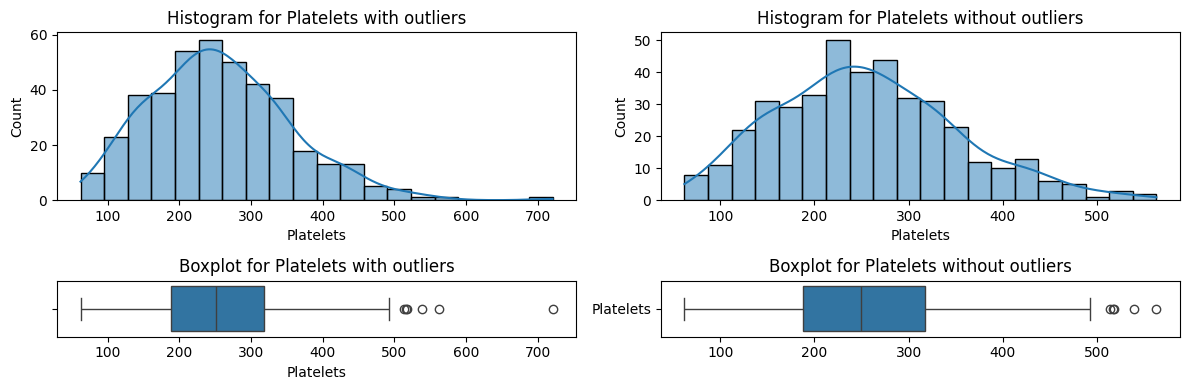

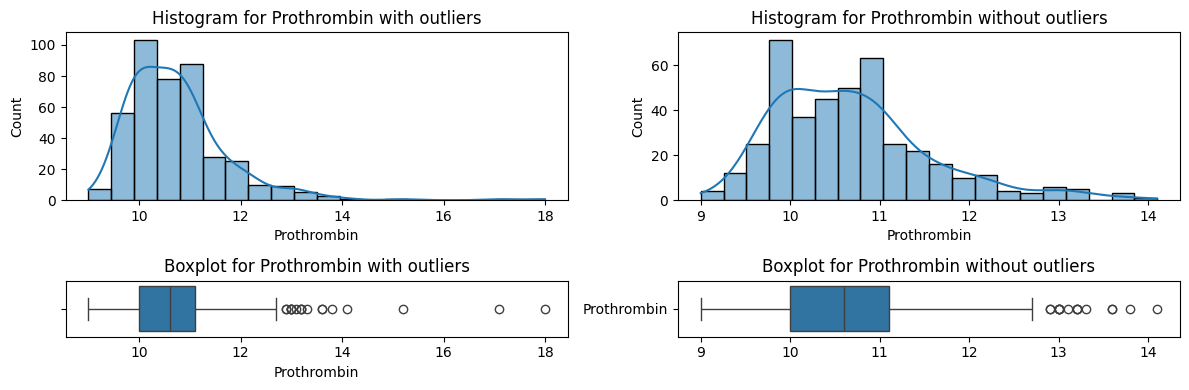

In [21]:
for col in num_features:
    plot_with_without_outliers(df, col, 3)

Si volem comparar els casos inicial, threshold igual a 1.3 i threshold igual a 3:

In [22]:
def plot_with_without_outliers(df, col, threshold1=1.5, threshold2=3):
    fig, axes = plt.subplots(2,3,figsize=(12,4), height_ratios=(3,1))
    data_to_plot = df[col]
    sns.histplot(data=data_to_plot, bins=20, ax=axes[0,0], kde=True)
    axes[0, 0].set_xlabel(col)
    axes[0, 0].set_ylabel('Count')
    axes[0, 0].set_title(f'Histogram for {col} with outliers')
    sns.boxplot(data=df[col], ax=axes[1,0], orient='h')
    axes[1, 0].set_title(f'Boxplot for {col} with outliers')

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    data_without_outliers = df[(df[col] >= Q1 - threshold1 * IQR) & (df[col] <= Q3 + threshold1 * IQR)][col]
    sns.histplot(data=data_without_outliers, bins=20, ax=axes[0, 1], kde=True)
    axes[0, 1].set_xlabel(col)
    axes[0, 1].set_ylabel('Count')
    axes[0, 1].set_title(f'Histogram for {col} without outliers')
    sns.boxplot(data=pd.DataFrame(data_without_outliers), ax=axes[1, 1], orient='h')
    axes[1, 1].set_title(f'Boxplot for {col} without outliers')

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    data_without_outliers = df[(df[col] >= Q1 - threshold2 * IQR) & (df[col] <= Q3 + threshold2 * IQR)][col]
    sns.histplot(data=data_without_outliers, bins=20, ax=axes[0, 2], kde=True)
    axes[0, 2].set_xlabel(col)
    axes[0, 2].set_ylabel('Count')
    axes[0, 2].set_title(f'Histogram for {col} without outliers')
    sns.boxplot(data=pd.DataFrame(data_without_outliers), ax=axes[1, 2], orient='h')
    axes[1, 2].set_title(f'Boxplot for {col} without outliers')
    plt.tight_layout()

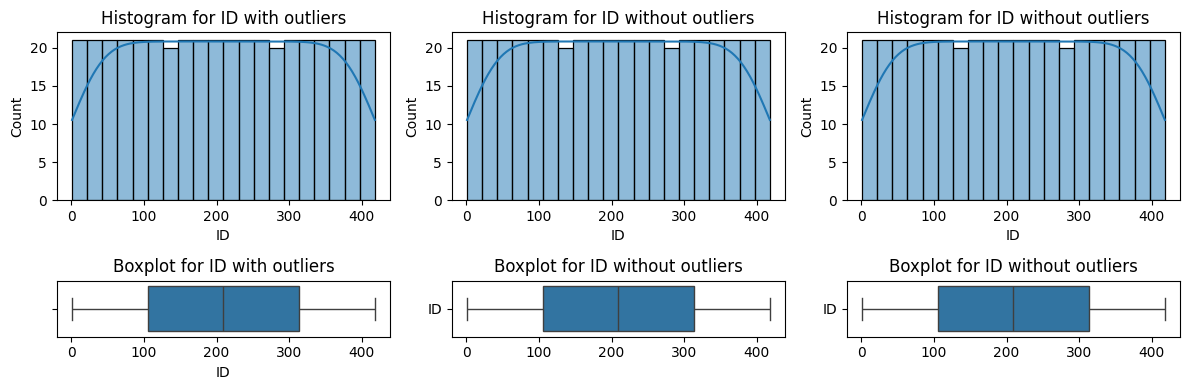

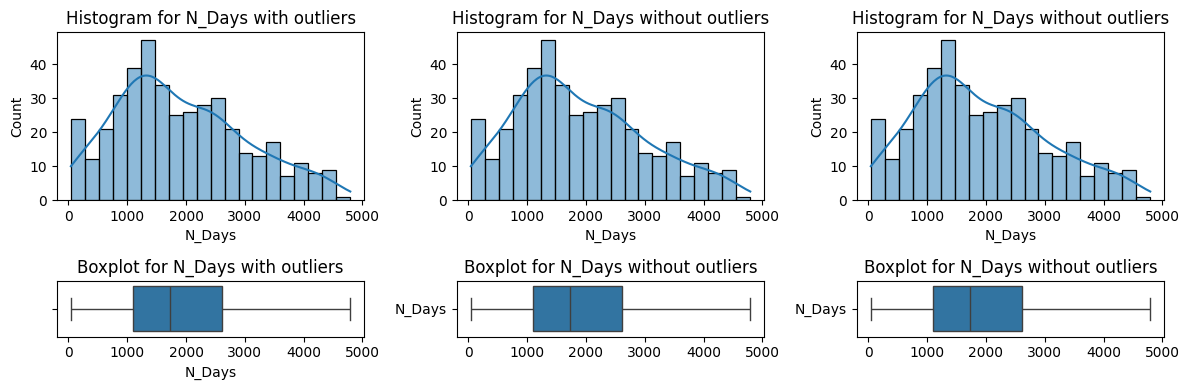

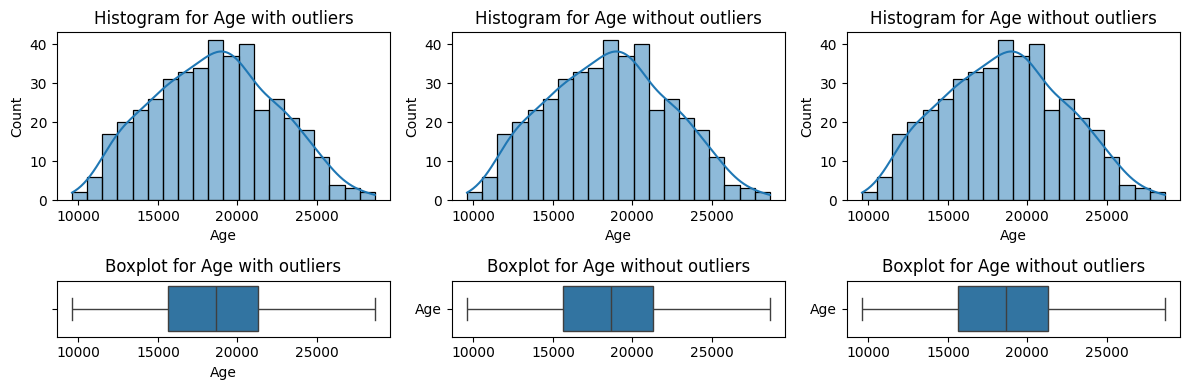

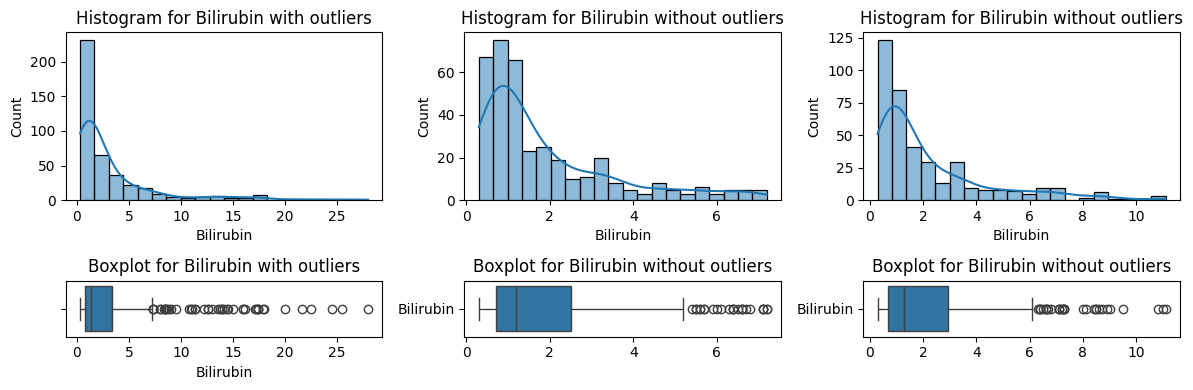

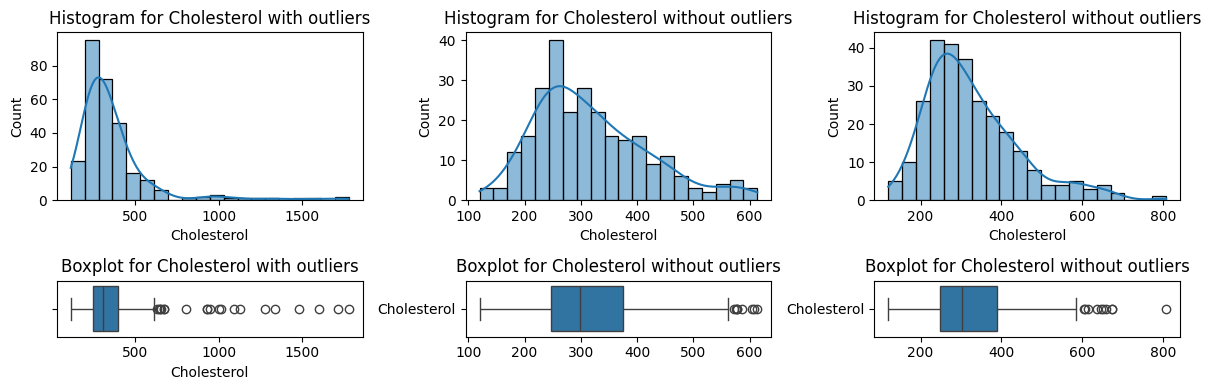

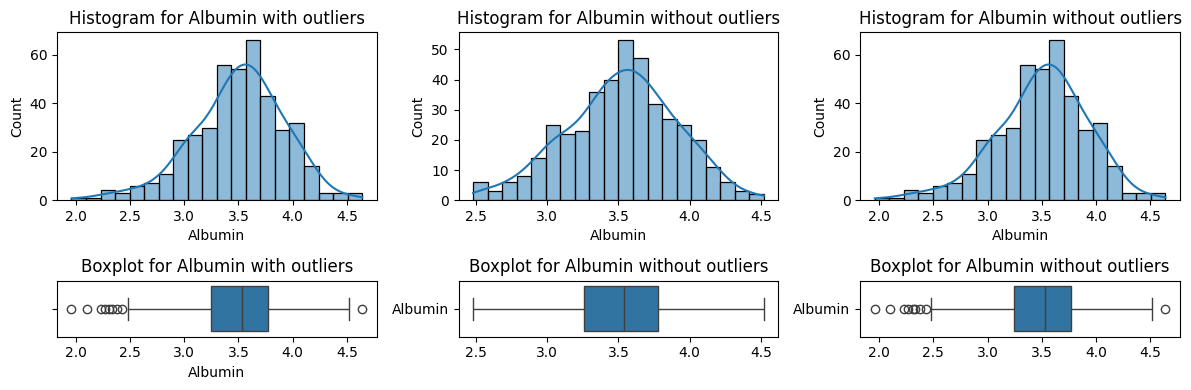

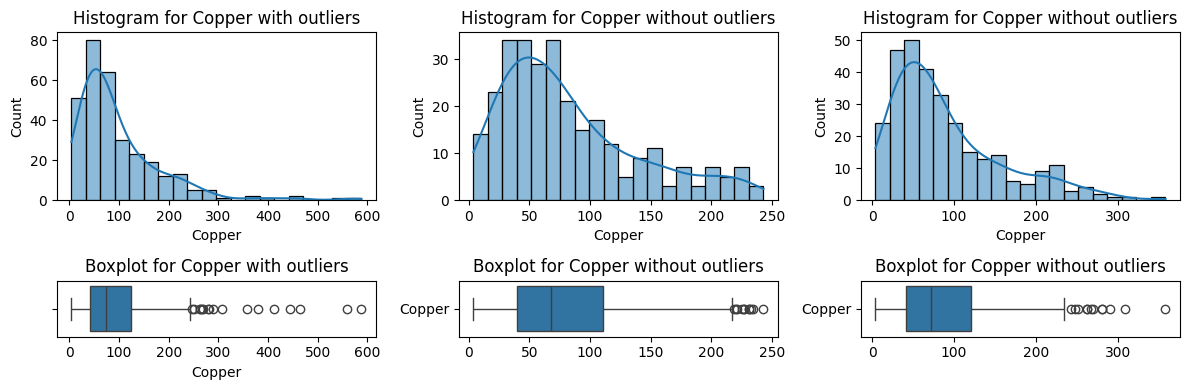

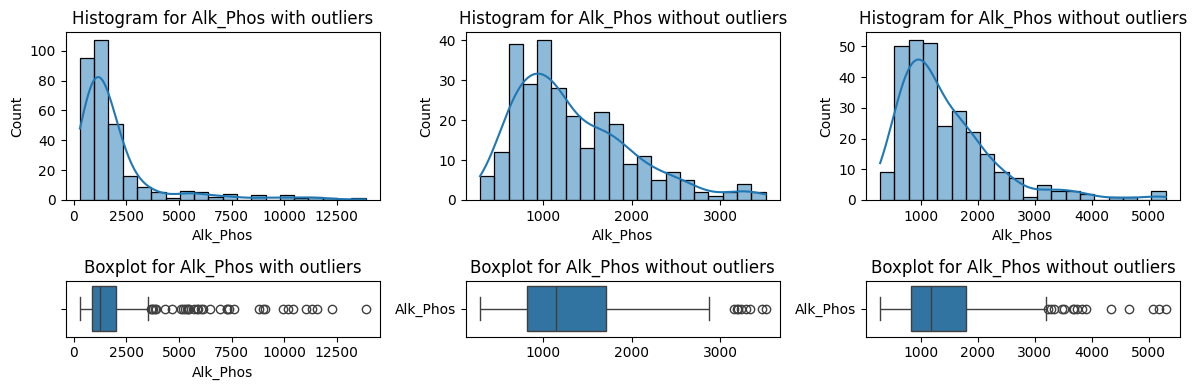

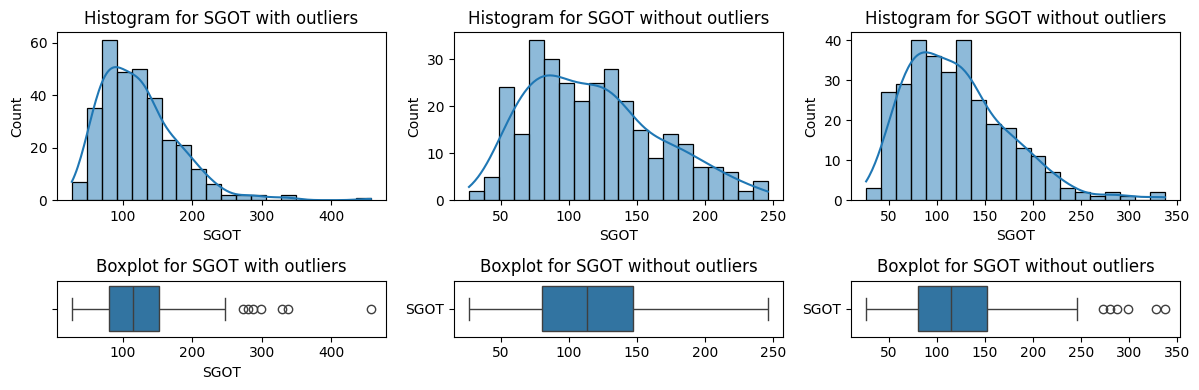

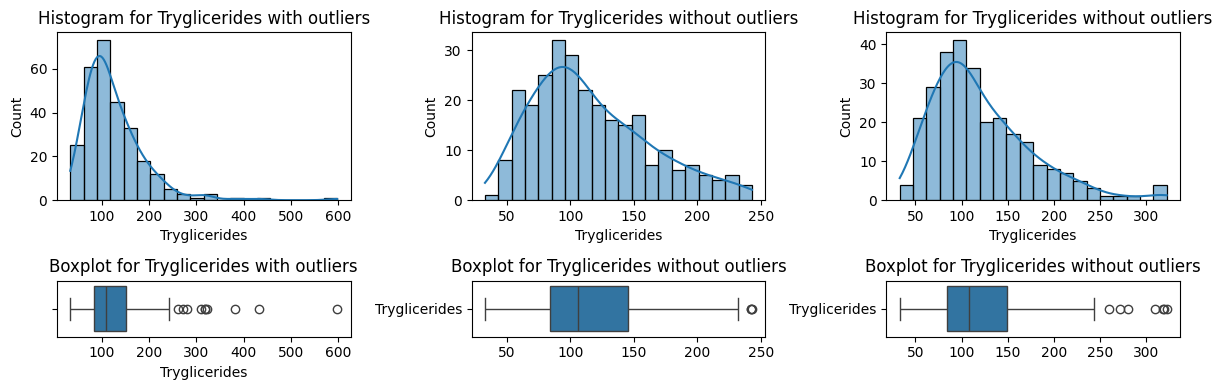

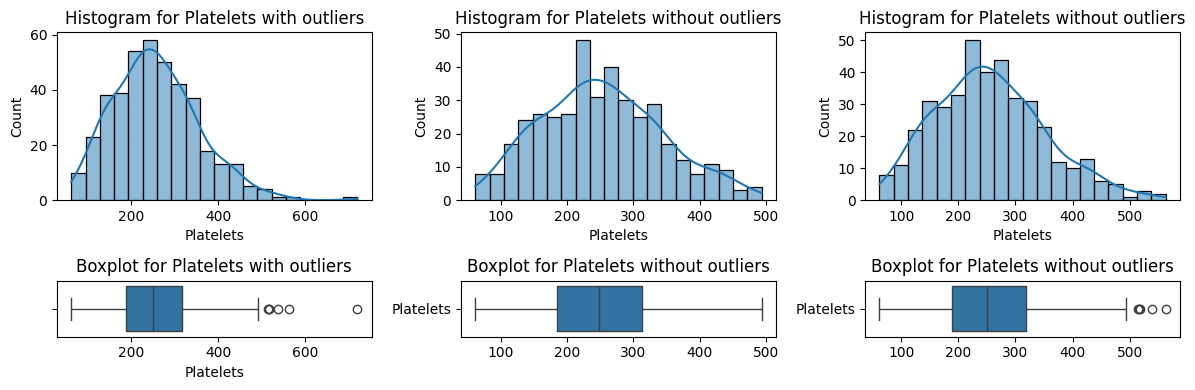

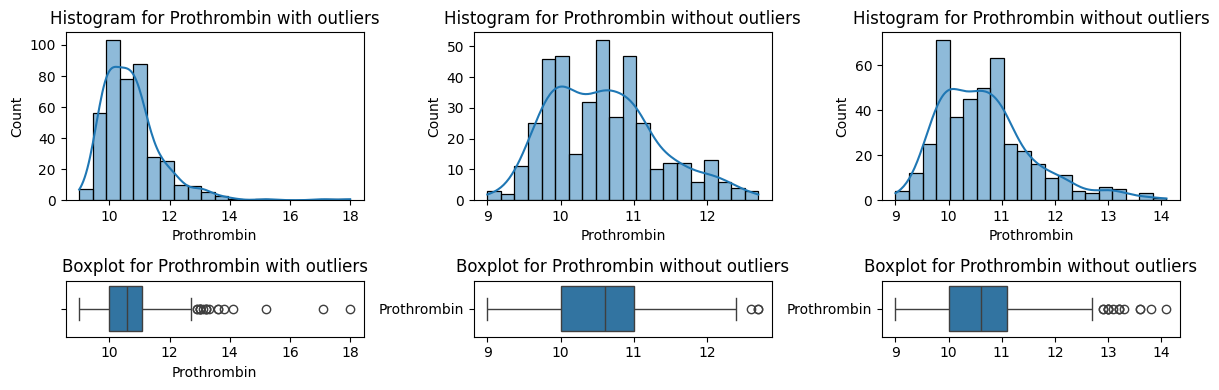

In [23]:
for col in num_features:
    plot_with_without_outliers(df, col, 1.5, 3)

### Particionat de les dades

A causa de la poca quantitat de dades que es disposa, es decideix:
- No tenir la part de validació
- Particionar les dades de tal manera que s'utilitzi la gran part per al train 

In [24]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'Status']
y = df["Status"]


X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, 
                     stratify=y,
                     random_state=0)

### Estudi dels valors missing

In [25]:
v_miss = pd.DataFrame(columns=['Quantitat de missing', 'Percentatge de missing'])

for i, col in enumerate(df.columns):
    values = df[col].isna().value_counts()
    na= values.get(True, 0)
    v_miss.loc[col,'Quantitat de missing'] = na
    v_miss.loc[col,'Percentatge de missing'] = (na/df.shape[0])*100
    
v_miss

,Quantitat de missing,Percentatge de missing
ID,0,0.0
N_Days,0,0.0
Status,0,0.0
Drug,106,25.358852
Age,0,0.0
Sex,0,0.0
Ascites,106,25.358852
Hepatomegaly,106,25.358852
Spiders,106,25.358852
Edema,0,0.0


Com tractar els missing?
- Treure les variables amb més de 30% de missing
- Imputar amb KNN les variables numèriques
- Imputar amb constant 'missing' les variables categòriques

In [26]:
from sklearn.impute import KNNImputer
import numpy as np

X_train2 = pd.DataFrame.copy(X_train,deep=True)
X_test2 = pd.DataFrame.copy(X_test,deep=True)

X_train2 = X_train2[num_features]
X_test2 = X_test2[num_features]
#
imputer = KNNImputer(n_neighbors=3)  # no agafar massa perquè les classes són desbalancejades

X_train2 = pd.DataFrame(imputer.fit_transform(X_train2), columns=num_features)
X_test2 = pd.DataFrame(imputer.transform(X_test2), columns=num_features)


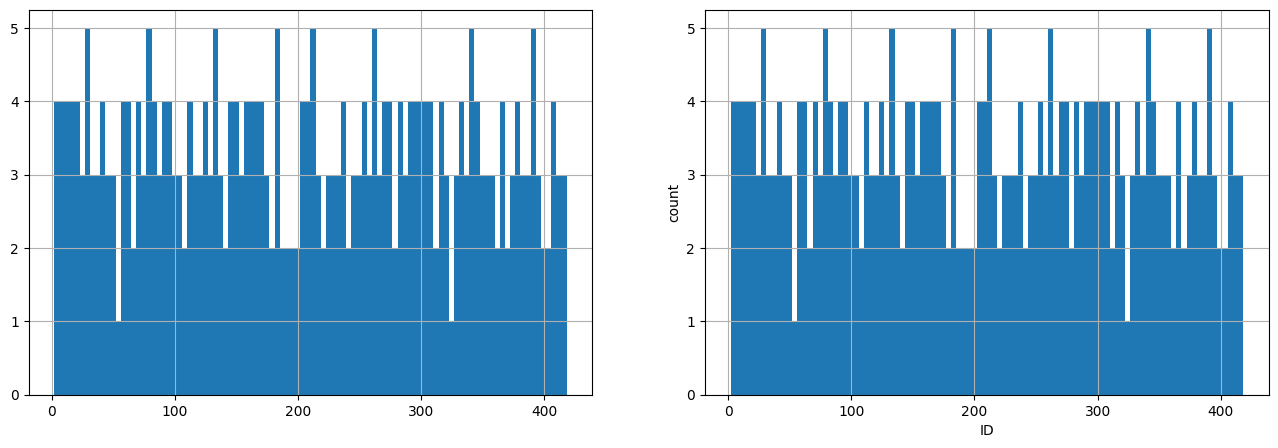

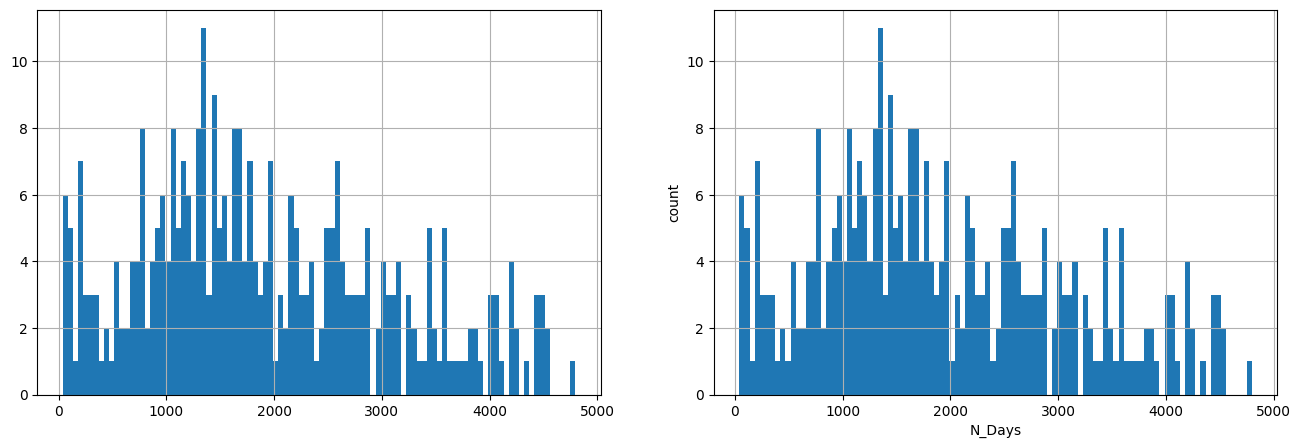

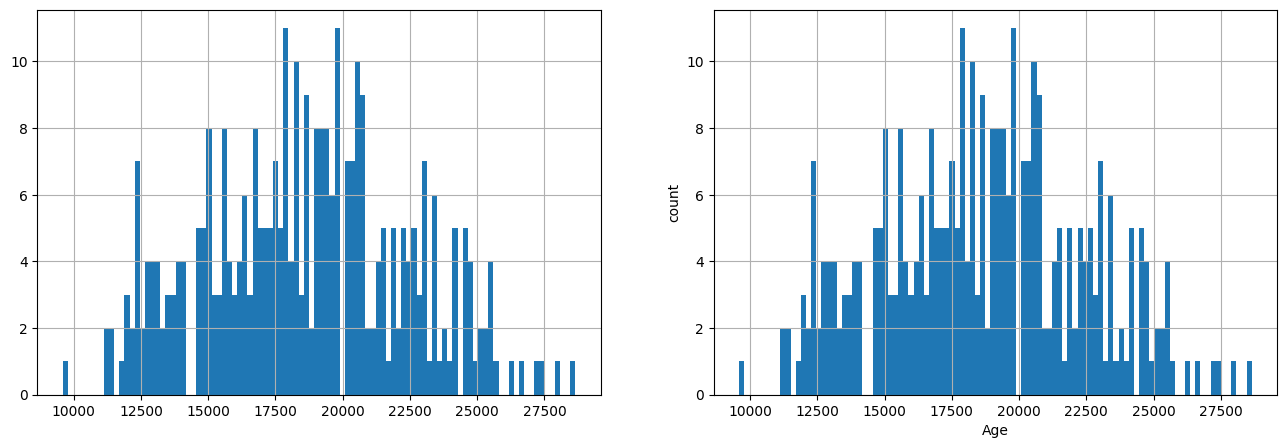

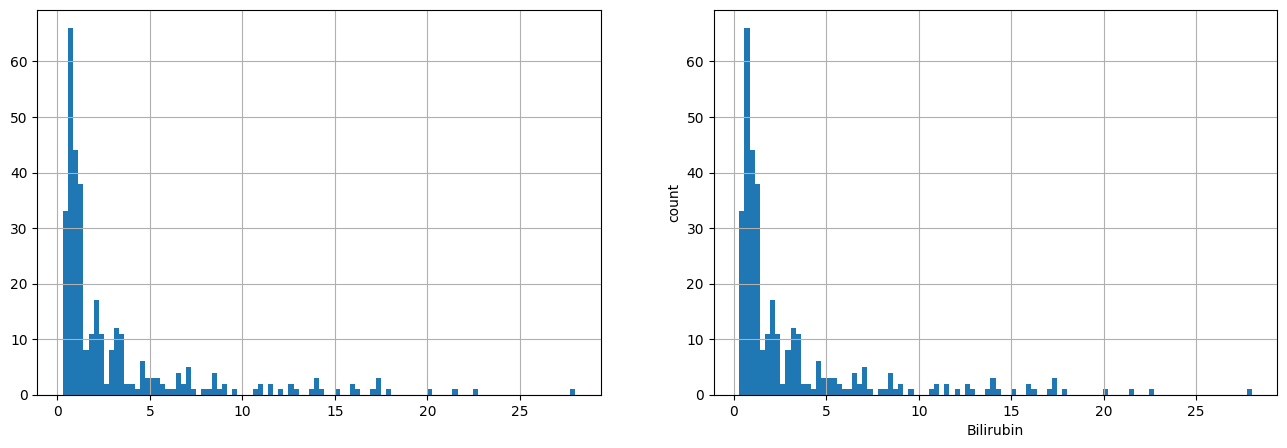

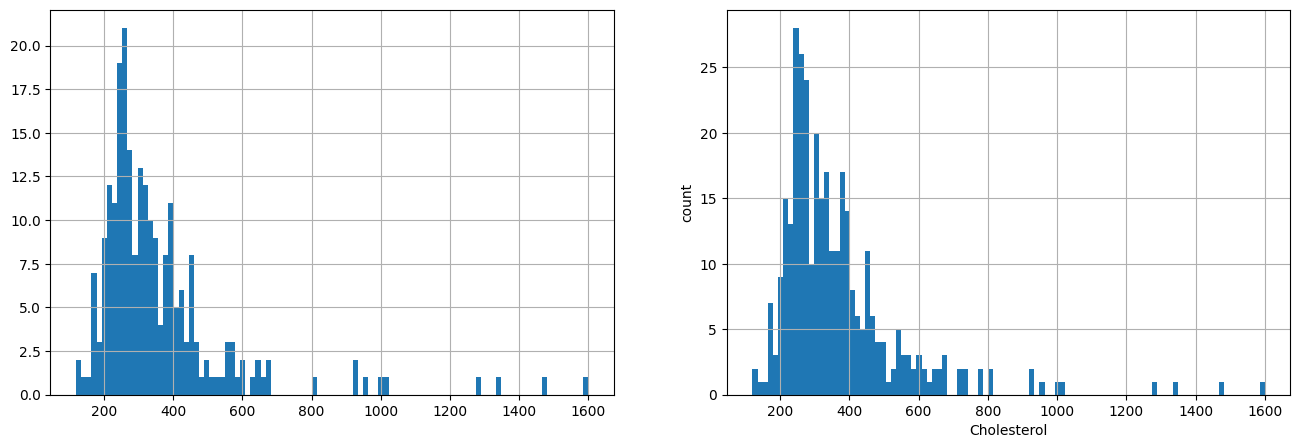

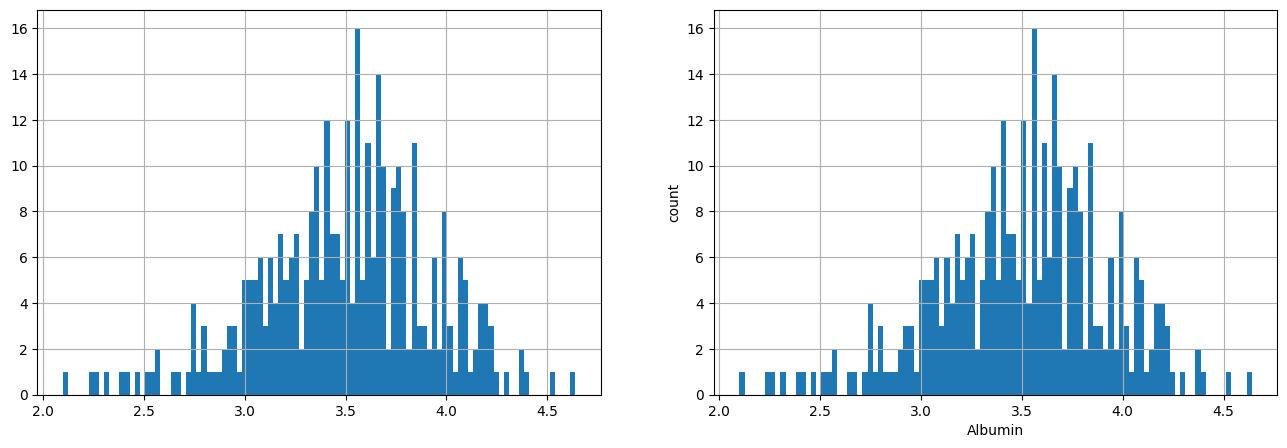

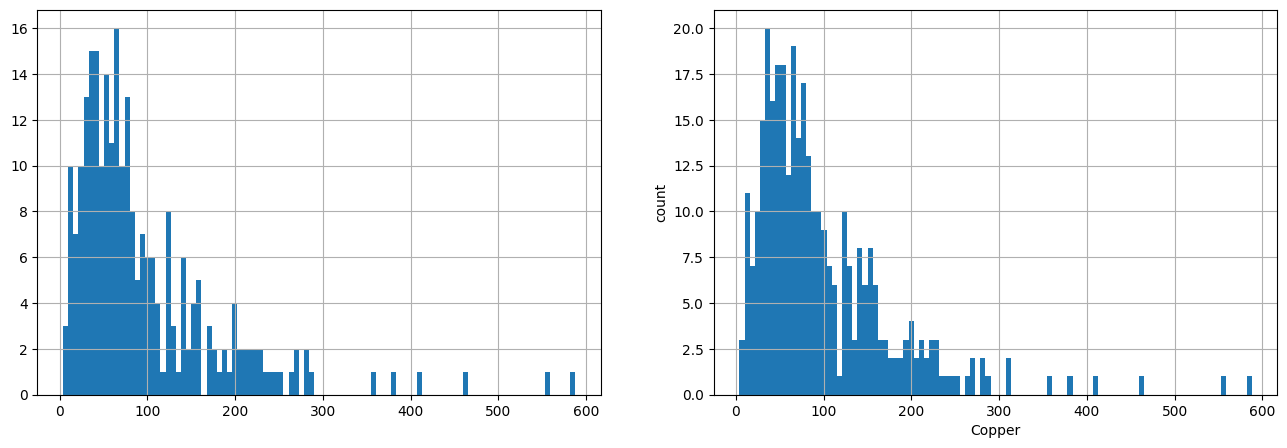

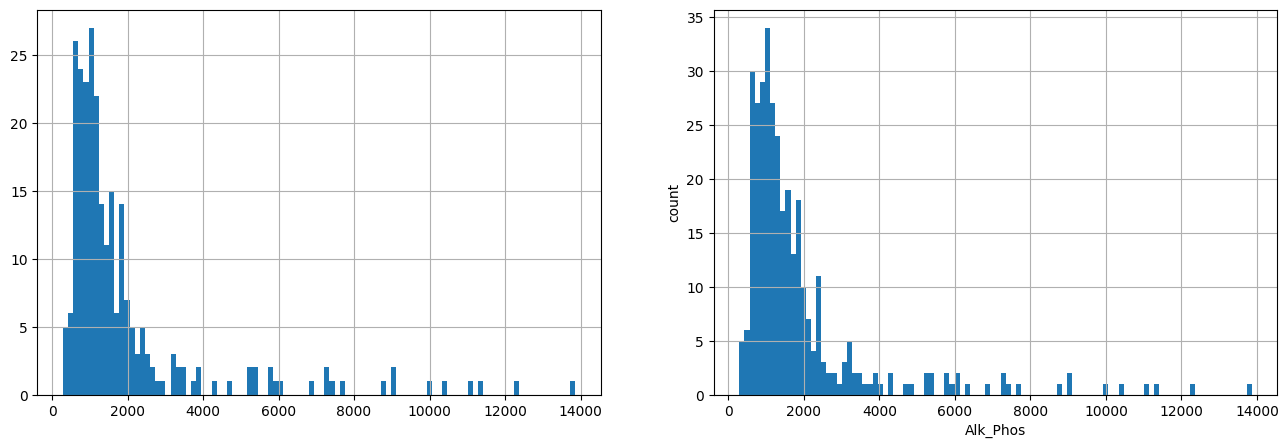

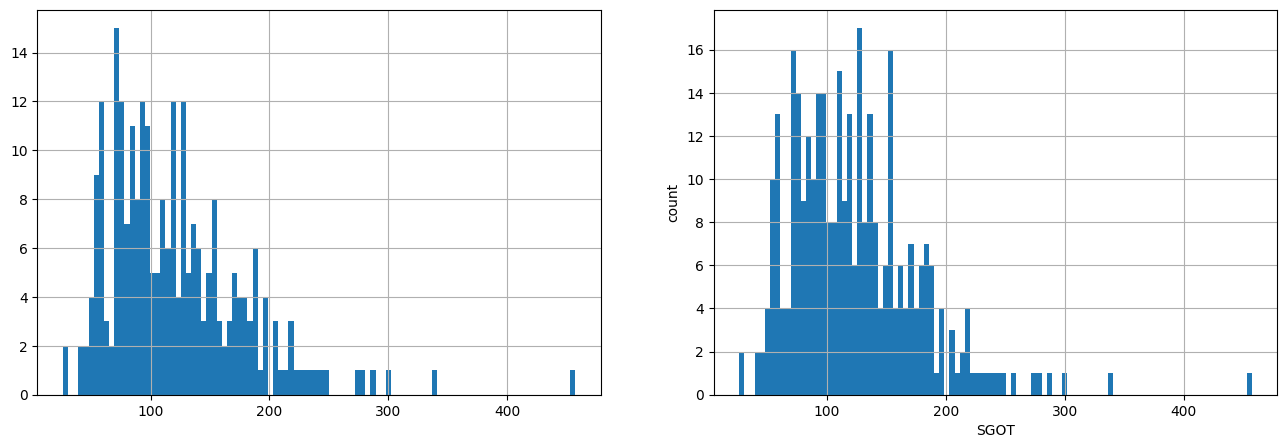

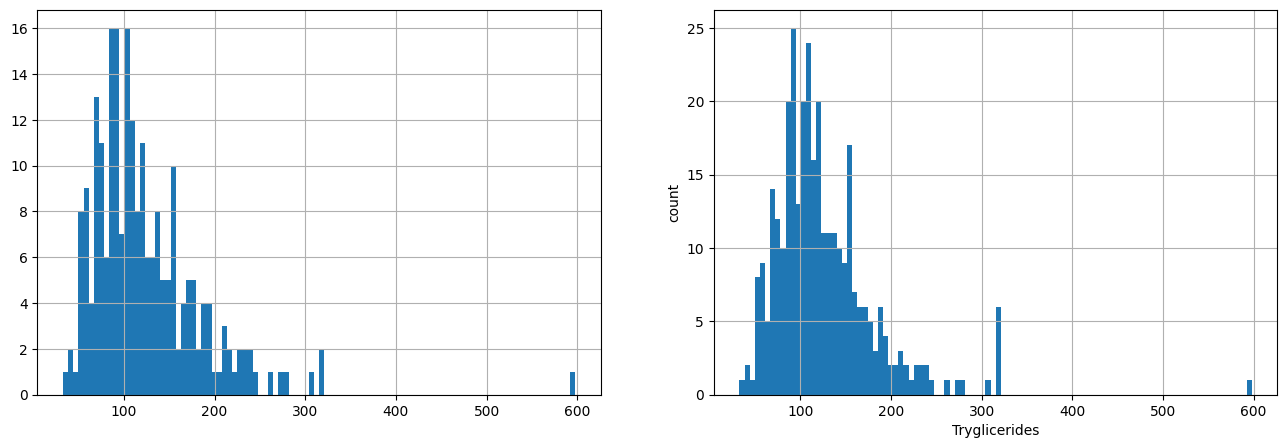

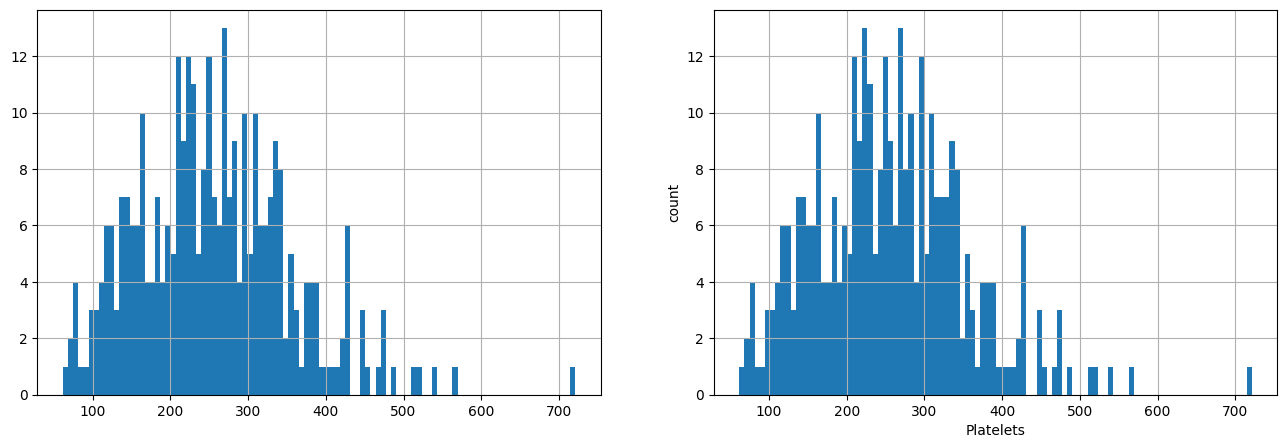

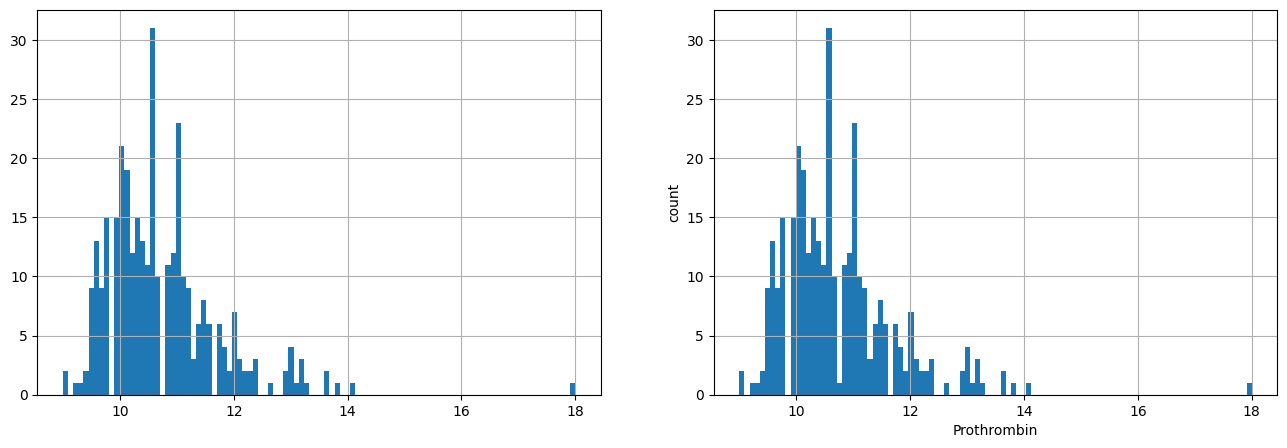

In [27]:
def print_h (df1, df2, col):
    fig, axes= plt.subplots(1,2, figsize=(16,5))
    df1[col].hist(ax=axes[0], bins=100);
    plt.xlabel(col)
    plt.ylabel("count")
    df2[col].hist(ax=axes[1], bins=100);
    plt.xlabel(col)
    plt.ylabel("count")

for num_var in num_features:
    print_h(X_train,X_train2,num_var)



Cholesterol i Tryglicerides tenen més de 30% de missing. Imputar-los amb KNN es veu que la distribució és semblant però la freqüència o count màxim és significativament més alt. Amb tants missing, la imputació probablement afegeix soroll i no sigui fiable. Es pot considerar trèure'ls

Per les categòriques, convertim els NaN a una modalitat nova 'missing'

In [28]:
from sklearn.impute import SimpleImputer

X_train3 = pd.DataFrame.copy(X_train,deep=True)
X_test3 = pd.DataFrame.copy(X_test,deep=True)
y_train3 = pd.DataFrame.copy(y_train,deep=True)
y_test3 = pd.DataFrame.copy(y_test,deep=True)

X_train3 = X_train3[cat_features[1:]]
X_test3 = X_test3[cat_features[1:]]

simple_imp = SimpleImputer(strategy="constant", fill_value="missing")

train3 = pd.concat([y_train3,X_train3[cat_features[1:]]], axis=1)
test3 = pd.concat([y_test3,X_test3[cat_features[1:]]], axis=1)

train3 = pd.DataFrame(simple_imp.fit_transform(train3),columns=cat_features)
test3 = pd.DataFrame(simple_imp.transform(test3),columns=cat_features)

/var/folders/sv/rjsj379n6s3dlghxjq1s54nh0000gn/T/ipykernel_90215/755175590.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X_train,x=col,ax=axes[0],palette='gist_rainbow_r')
/var/folders/sv/rjsj379n6s3dlghxjq1s54nh0000gn/T/ipykernel_90215/755175590.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train3,x=col,ax=axes[1],palette='gist_rainbow_r')


/var/folders/sv/rjsj379n6s3dlghxjq1s54nh0000gn/T/ipykernel_90215/755175590.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X_train,x=col,ax=axes[0],palette='gist_rainbow_r')
/var/folders/sv/rjsj379n6s3dlghxjq1s54nh0000gn/T/ipykernel_90215/755175590.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train3,x=col,ax=axes[1],palette='gist_rainbow_r')
/var/folders/sv/rjsj379n6s3dlghxjq1s54nh0000gn/T/ipykernel_90215/755175590.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X_train,x=col,ax=axes[0],palette='gist_rainb

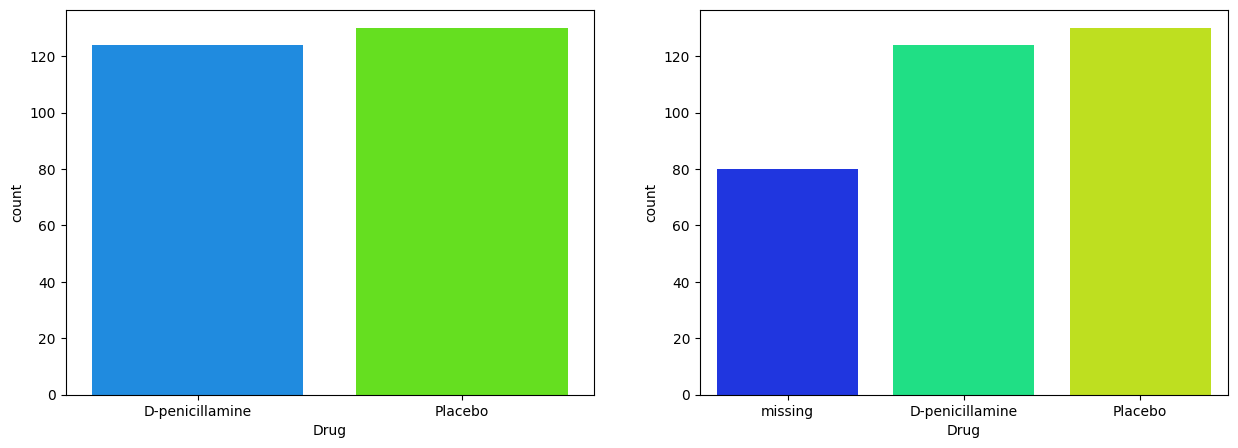

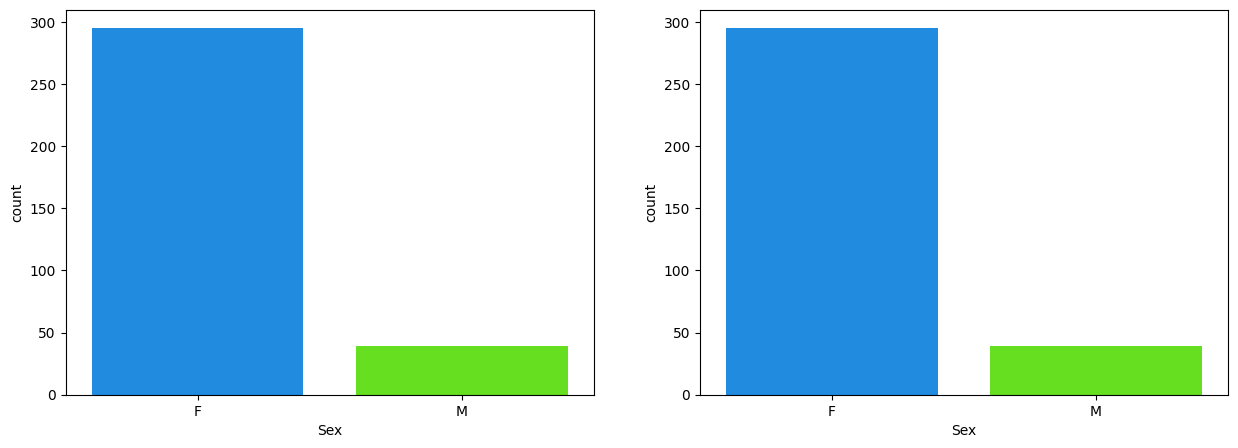

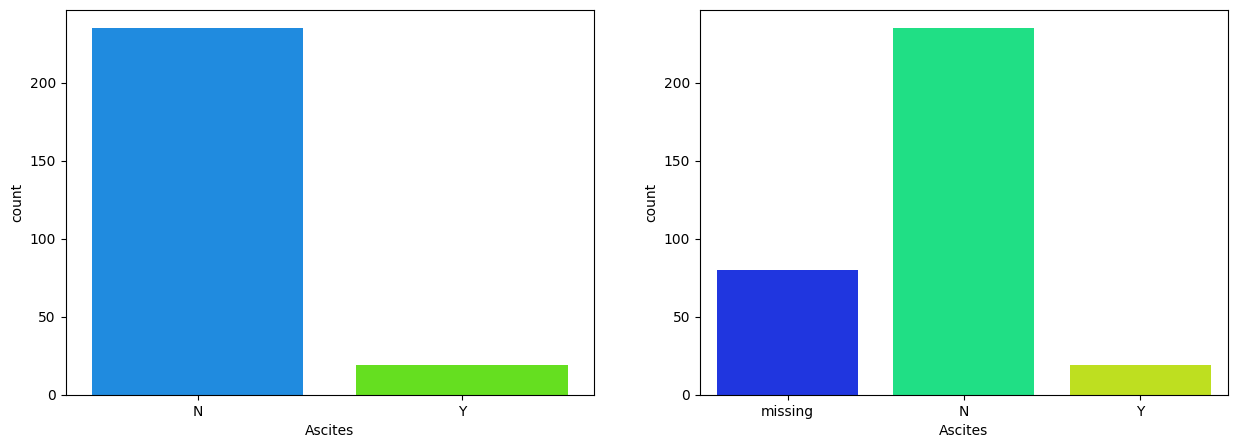

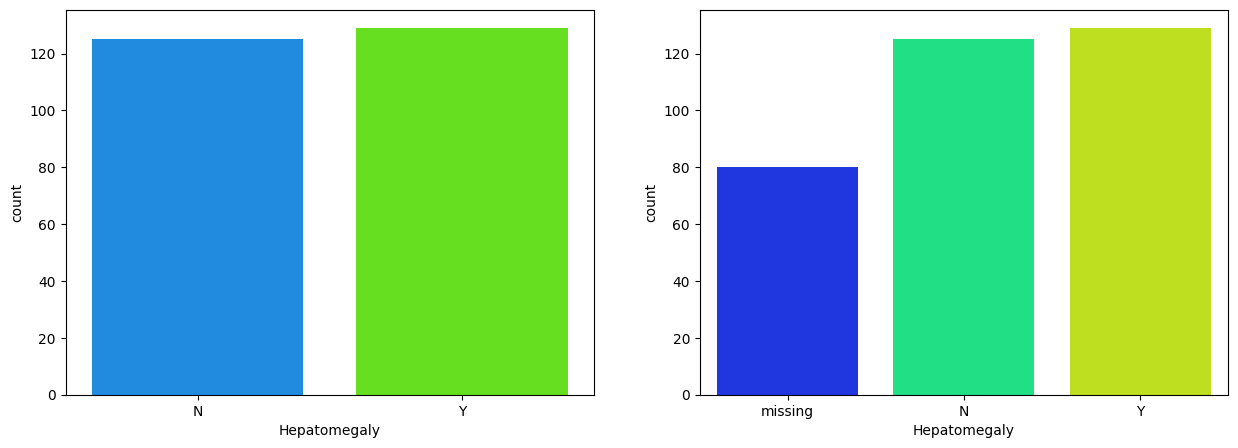

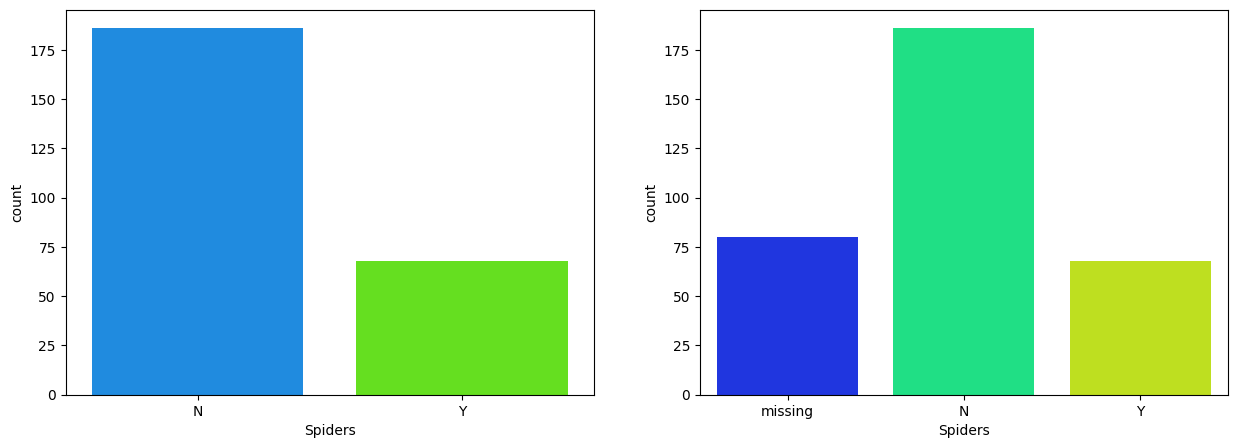

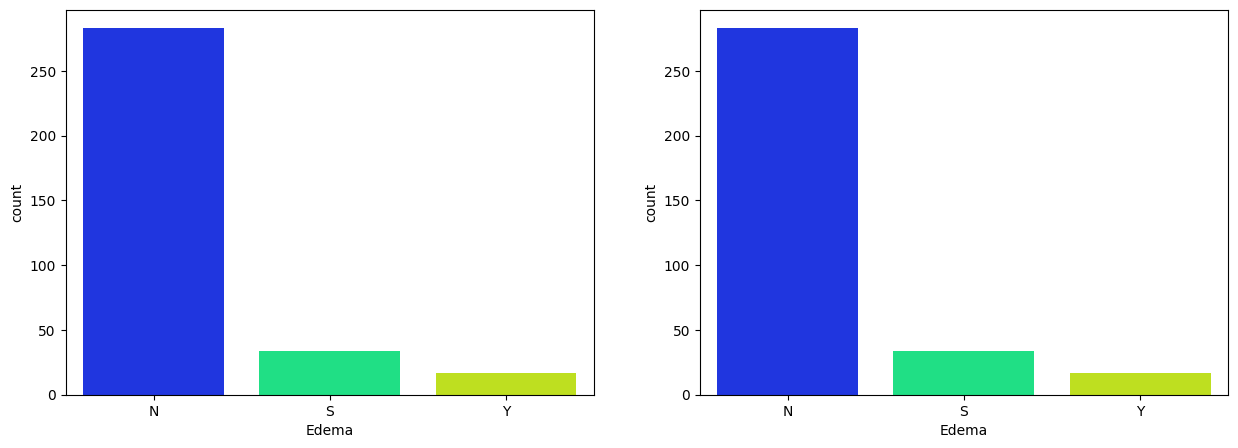

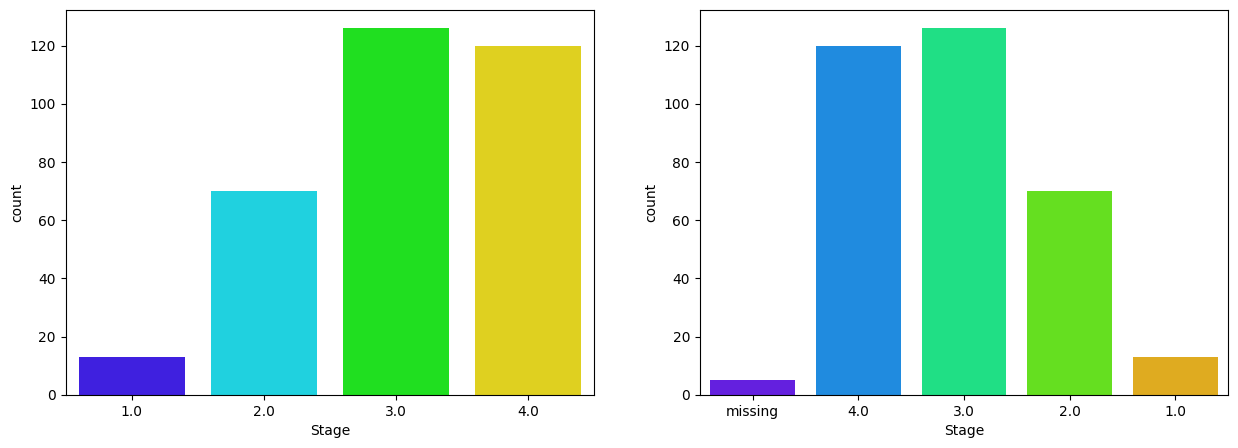

In [29]:
import seaborn as sns
for col in cat_features[1:]:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    #plt.figure(figsize=(6,3), dpi=100)
    sns.countplot(data=X_train,x=col,ax=axes[0],palette='gist_rainbow_r')
    sns.countplot(data=train3,x=col,ax=axes[1],palette='gist_rainbow_r')


In [30]:
train_imp = pd.concat([X_train2,train3], axis=1)
test_imp = pd.concat([X_test2,test3], axis=1)

### Estudi de balanceig de classes

/var/folders/sv/rjsj379n6s3dlghxjq1s54nh0000gn/T/ipykernel_90215/3737174306.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Class 0:', target_count[0])
/var/folders/sv/rjsj379n6s3dlghxjq1s54nh0000gn/T/ipykernel_90215/3737174306.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Class 1:', target_count[1])
/var/folders/sv/rjsj379n6s3dlghxjq1s54nh0000gn/T/ipykernel_90215/3737174306.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use 

Class 0: 232
Class 1: 161
Class 2: 25


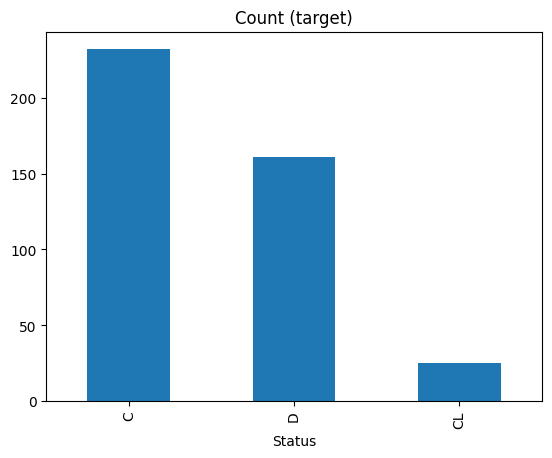

In [31]:

target_count = df['Status'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Class 2:', target_count[2])

target_count.plot(kind='bar', title='Count (target)');

## SECCIÓ 2

### Normalització de variables

Per fer la normalització de les variables, analitzem la tècnica StandardScaler


In [32]:
from sklearn import preprocessing

X_train_std = pd.DataFrame.copy(X_train2,deep=True)
X_test_std = pd.DataFrame.copy(X_test2,deep=True)

std_scaler = preprocessing.StandardScaler()
X_train_std[num_features] = std_scaler.fit_transform(X_train_std[num_features])
X_test_std[num_features] = std_scaler.transform(X_test_std[num_features])


In [33]:
X_train_std

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,0.938726,-1.650298,-0.490454,0.426822,0.654555,-1.342742,0.851944,-0.122870,1.154108,0.040343,0.038036,-0.322439
1,-0.231767,0.576744,1.857645,-0.599282,-0.370536,1.379023,-0.590659,-0.635768,-0.899462,0.000189,0.701831,-0.525381
2,-1.310945,2.196810,-0.183784,-0.296115,-0.584023,0.479657,2.269674,4.357317,1.216762,0.900781,-0.431727,0.286388
3,-0.597028,1.075833,-0.849084,-0.575962,1.104466,0.408654,-0.789639,-0.282777,0.079343,-0.355459,1.743479,-0.018026
4,1.021740,-0.403891,1.172526,-0.575962,-0.119997,-0.230369,-0.487024,-0.408137,-0.307288,-0.103064,1.171594,-0.626852
...,...,...,...,...,...,...,...,...,...,...,...,...
329,0.091986,-0.993325,-1.461084,1.919337,1.263258,-0.443376,-0.416552,-0.058566,0.539956,1.451461,0.426101,0.083445
330,0.847411,-0.674925,0.994684,-0.645923,-0.652833,0.195647,-0.926437,-0.568043,-0.591148,-0.217789,0.323979,-0.322439
331,-0.555521,0.160983,-0.415996,-0.482679,-0.218801,-0.443376,0.752454,-0.330492,-0.525213,0.143595,-1.167008,0.895214
332,-1.169822,1.815257,-1.057726,-0.459359,-0.599902,0.242982,-0.304626,-0.605497,0.338438,-0.303833,1.774116,-0.728324


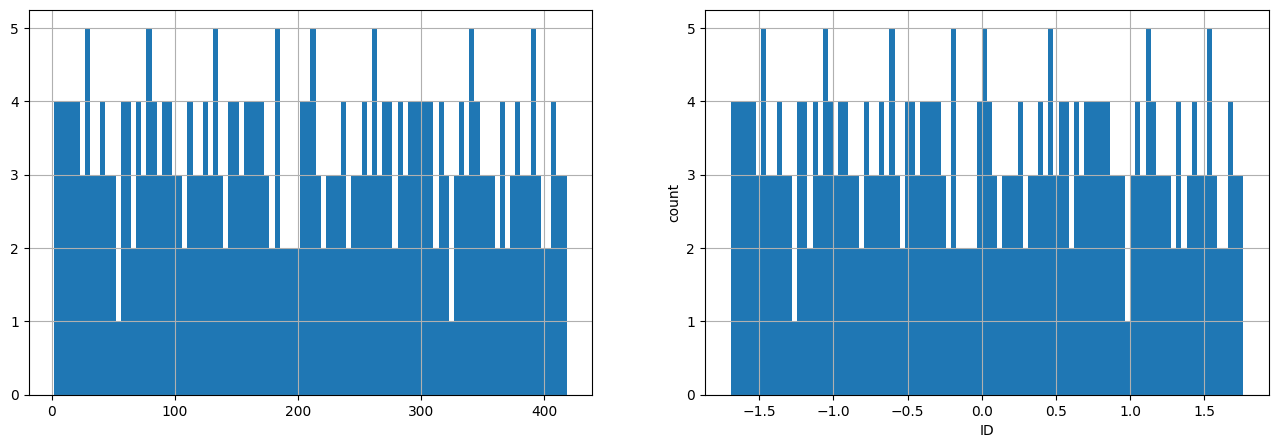

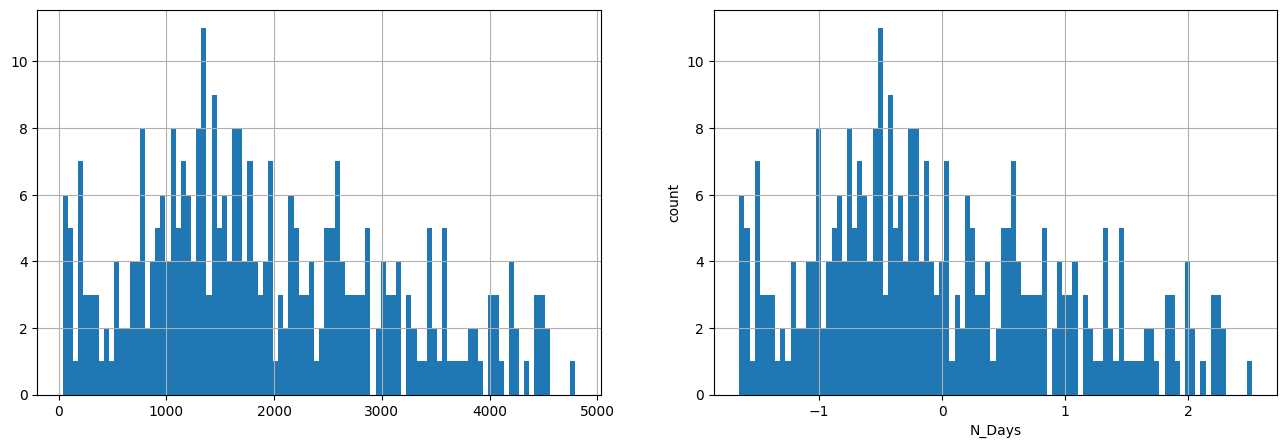

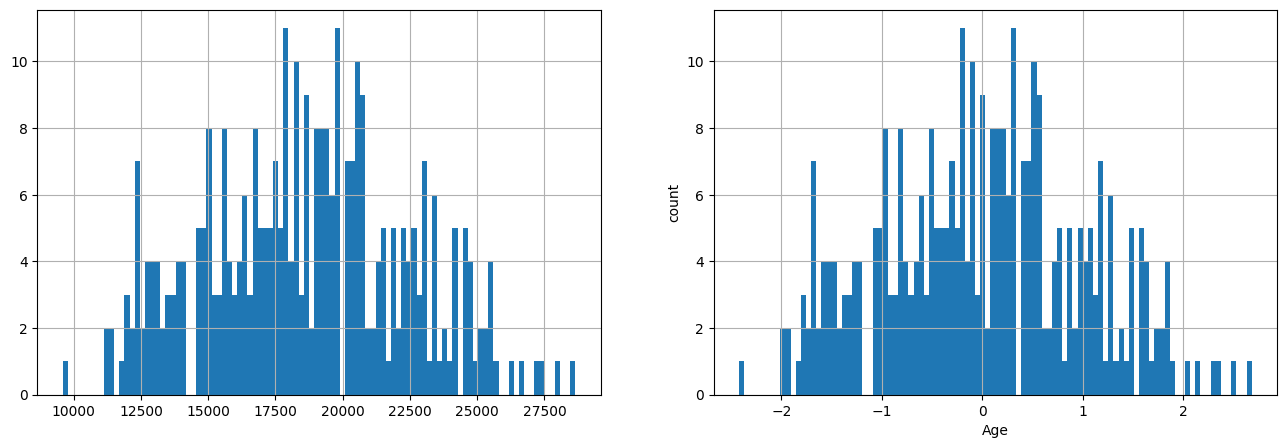

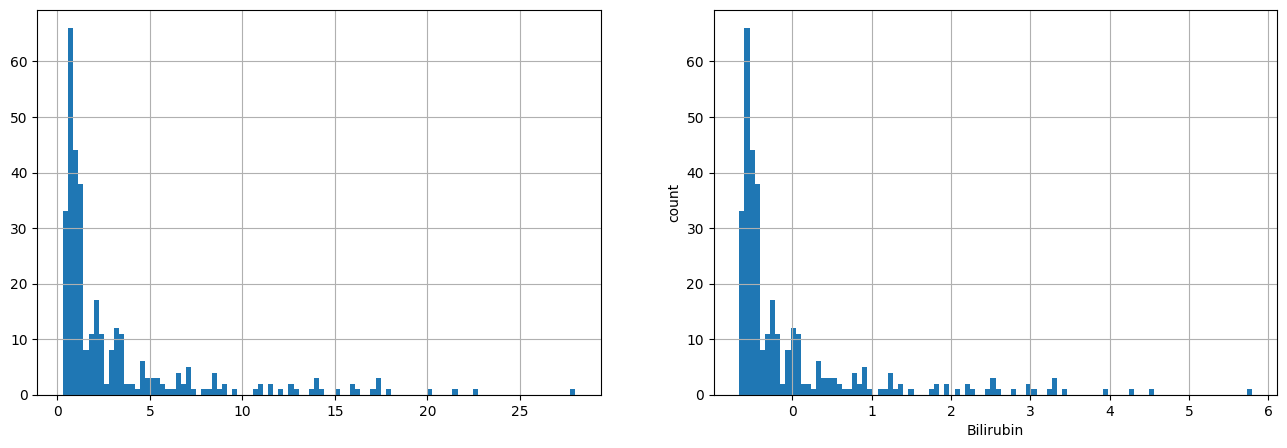

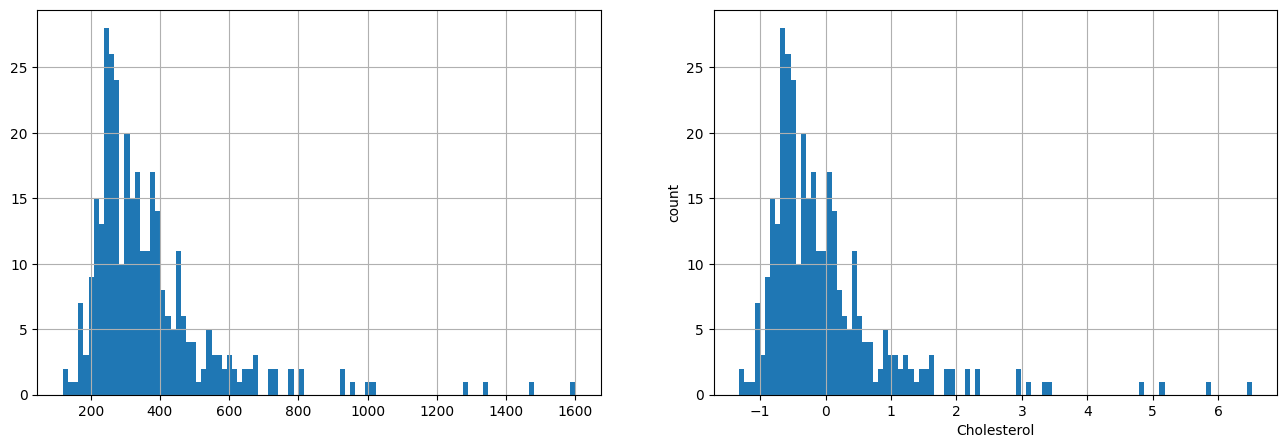

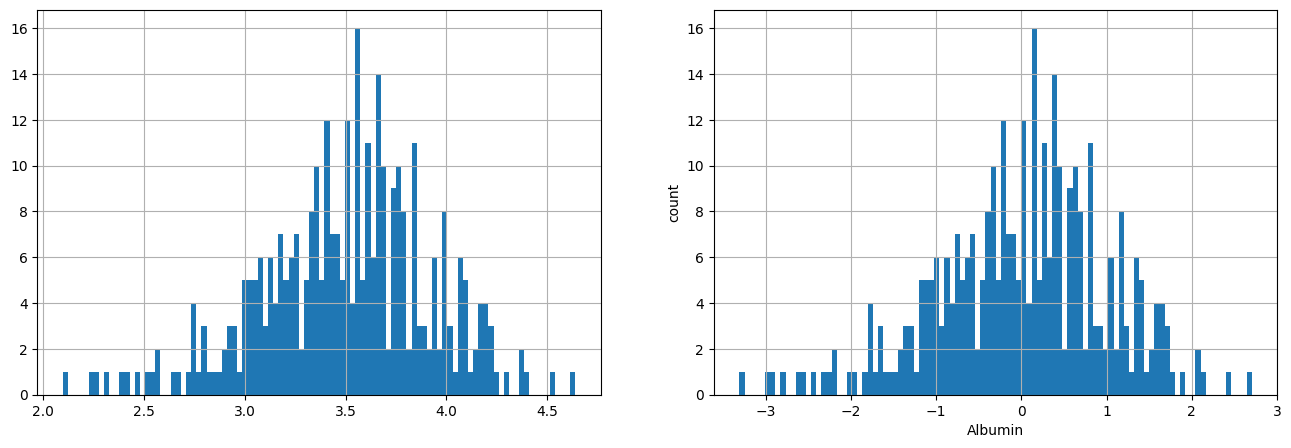

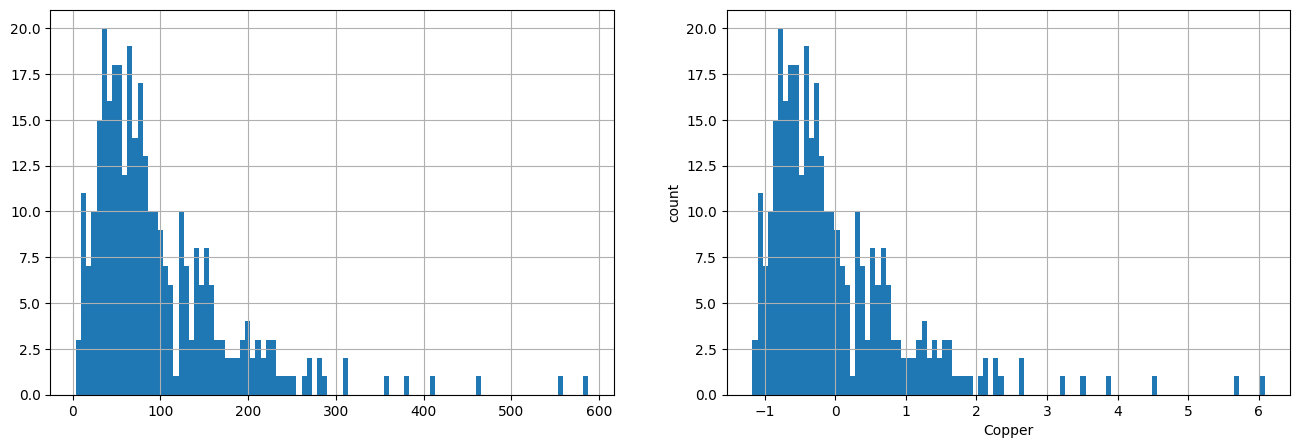

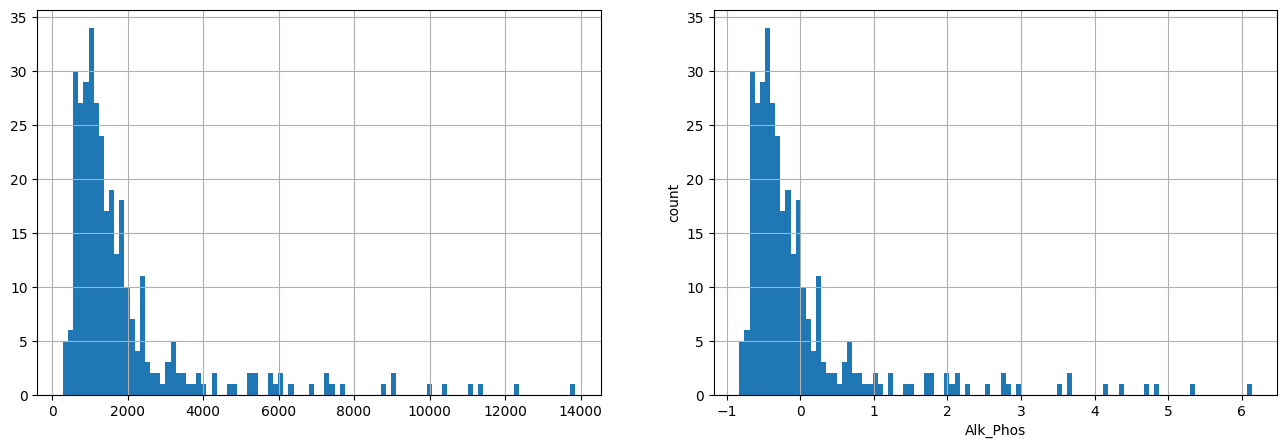

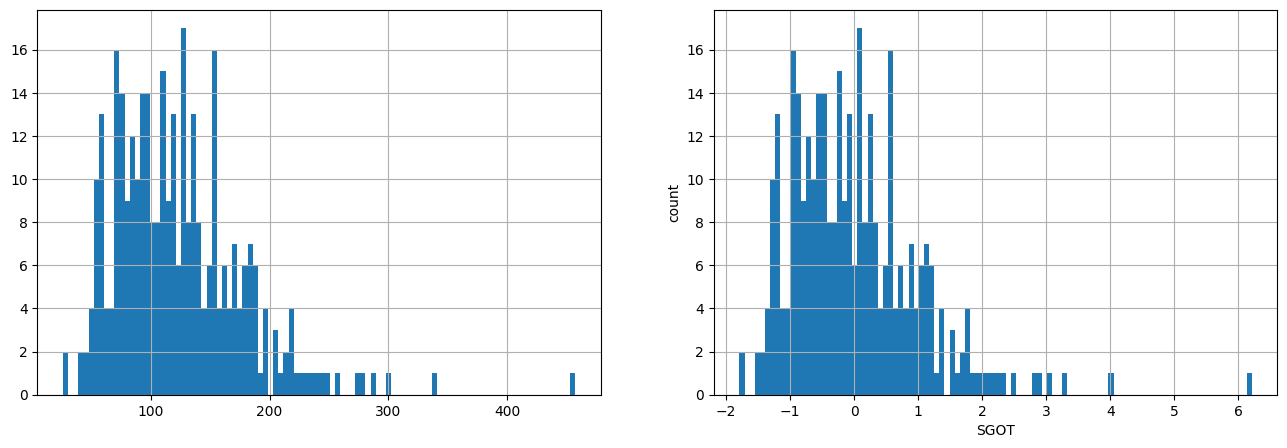

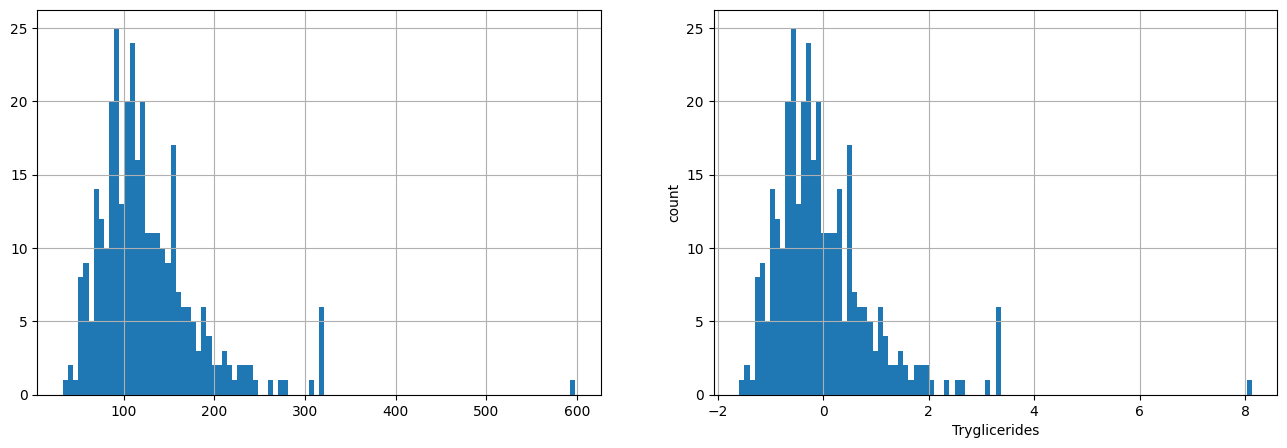

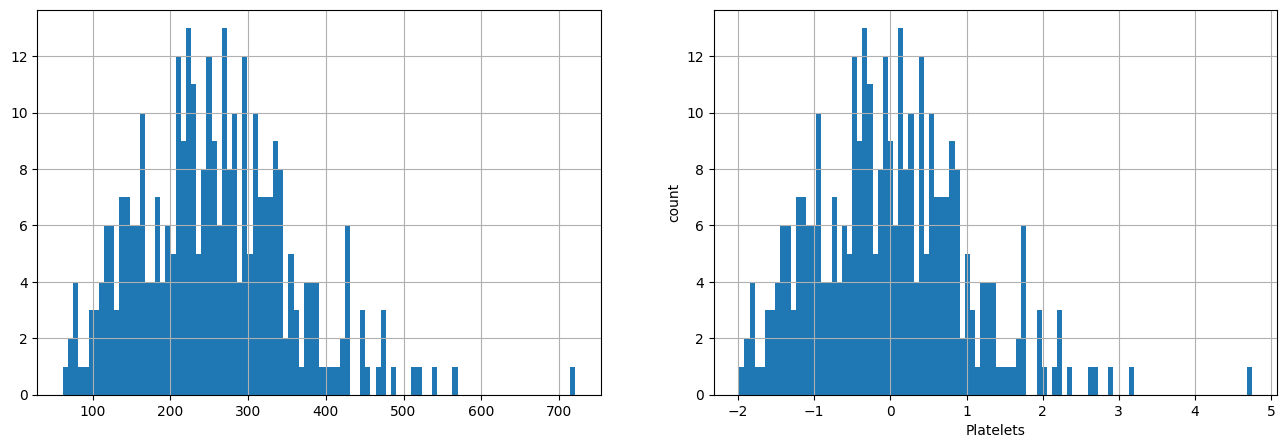

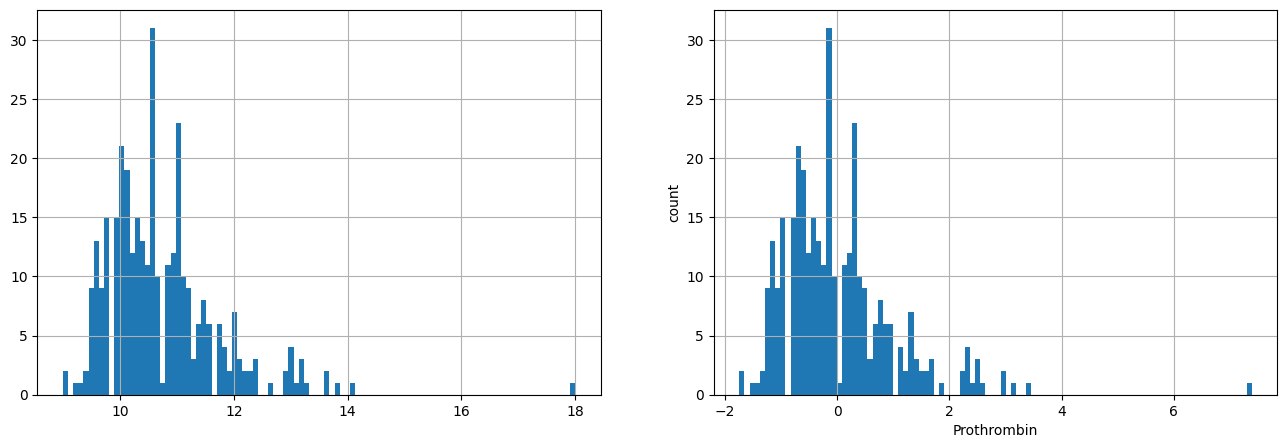

In [34]:
for num_var in num_features:
    print_h(X_train2,X_train_std,num_var)

### Anàlisi de correlacions entre variables numèriques

In [35]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# Measuring correlations
X_train_num = X_train[num_features]
corr = np.round(X_train_num.corr(), 2)

# Filtering redundant values
mask = np.triu(np.ones_like(corr, dtype = bool))
c_mask = np.where(~mask, corr, 100)

#print(corr)
print(mask)
#print(c_mask)
c = []
for i in c_mask.tolist()[1:]:
    c.append([x for x in i if x != 100])

# Creating annotated heatmap
fig = ff.create_annotated_heatmap(z=c[::-1],
                                  x=corr.index.tolist()[:-1],
                                  y=corr.columns.tolist()[1:][::-1],
                                  colorscale = 'Magenta')

fig.update_layout(title = {'text': '<b>Correlation Among Independent Features</b>',
                           'x': 0.05, 'xanchor': 'left'},
                  margin = dict(t=210, l = 110),
                  yaxis = dict(autorange = 'reversed', showgrid = False),
                  xaxis = dict(showgrid = False),
                  plot_bgcolor = '#F6F5F5',
                  paper_bgcolor = '#F6F5F5',
                  height = 950, width = 950)
                     

fig.add_trace(go.Heatmap(z = c[::-1],
                         colorscale = 'Magenta',
                         showscale = True,
                         visible = False))
fig.data[1].visible = True
for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 12

fig.show()

[[ True  True  True  True  True  True  True  True  True  True  True  True]
 [False  True  True  True  True  True  True  True  True  True  True  True]
 [False False  True  True  True  True  True  True  True  True  True  True]
 [False False False  True  True  True  True  True  True  True  True  True]
 [False False False False  True  True  True  True  True  True  True  True]
 [False False False False False  True  True  True  True  True  True  True]
 [False False False False False False  True  True  True  True  True  True]
 [False False False False False False False  True  True  True  True  True]
 [False False False False False False False False  True  True  True  True]
 [False False False False False False False False False  True  True  True]
 [False False False False False False False False False False  True  True]
 [False False False False False False False False False False False  True]]


Veiem que:
- ID és una variable que no té gaire correlació amb els altres i només identifica la mostra
- Les correlacions en global no són altes


### Anàlisi de variables categòriques i variable objectiu

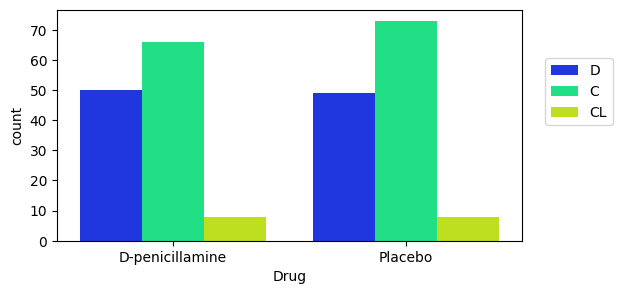

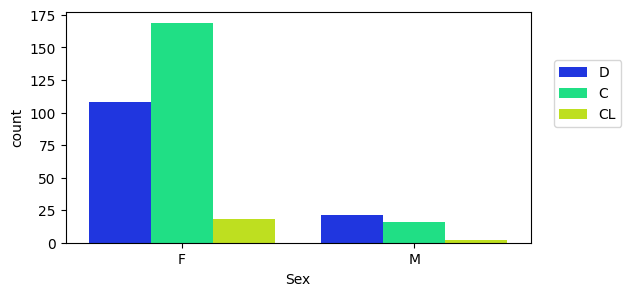

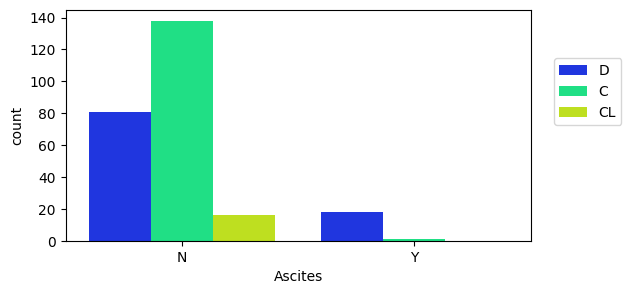

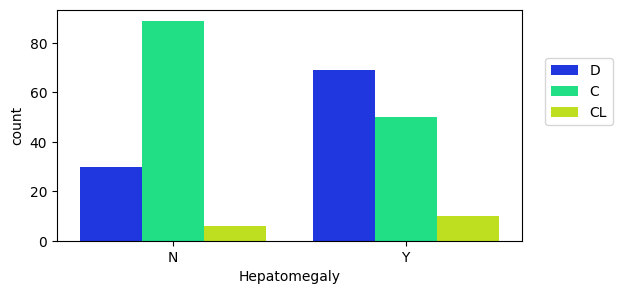

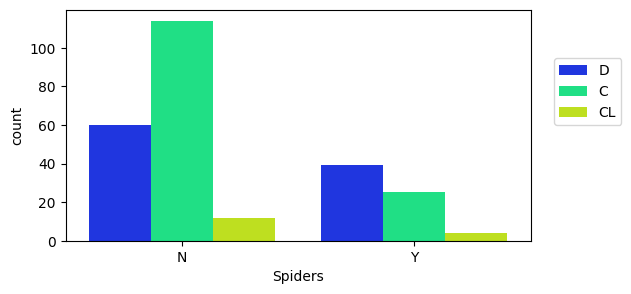

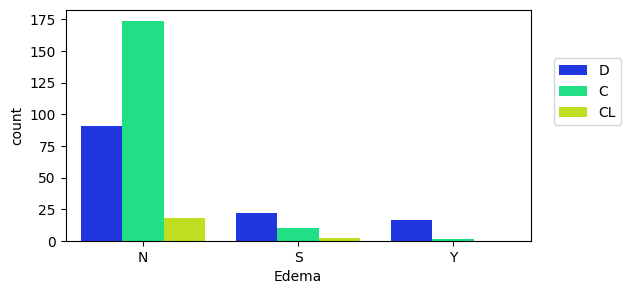

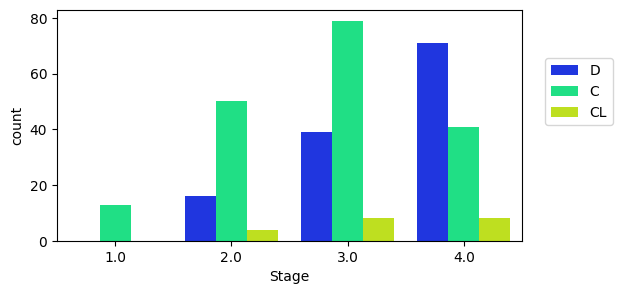

In [36]:
for col in cat_features[1:]:
    plt.figure(figsize=(6,3), dpi=100)
    sns.countplot(data=X_train,x=col,hue = y_train,palette='gist_rainbow_r')
    plt.legend(loc=(1.05,0.5))

Podem observar que:
- La distribució de la variable resposta 'Status' no es veu gaire afectat per la variable 'Drug' 
- Tenim molta més informació sobre les dones
- El fet de ser dona, no tenir presència d'Ascites, no tenir presència de Spiders o sense Edema i sense tractament diürètic per a l'Edema augmenta els casos de censurat i de censurat per trasplantament hepàtic
- La quantitat de morts augmenten en funció de Stage

### Eliminació de variables redundants o sorolloses

Segons les analitzacions dels apartats anterior, hem d'eliminar les següents variables del train i test:
- Cholesterol: gran quatitat de missing
- Tryglicerides: gran quatitat de missing
- ID: no aporta informació
- Drug: no aporta informació rellevant

In [37]:
var_to_drop = ['Cholesterol','Tryglicerides','ID','Drug']

for var in var_to_drop:
    X_train = X_train.drop(var,axis=1)
    X_test= X_test.drop(var,axis=1)


### Estudi de dimensionalitat amb PCA

Per fer la PCA amb tota la base de dades cal:
- Transformar les variables categòriques en tants binàries com modalitats tingui
- Normalitzar les variables

In [38]:
colX = [col for col in train_imp.columns if col != 'Status']

X_train_imp = train_imp[colX].copy()
y_train_imp = train_imp['Status'].copy()

X_test_imp = test_imp[colX].copy()
y_test_imp = test_imp['Status'].copy()

for var in var_to_drop:
    if var in X_train_imp:
        X_train_imp = X_train_imp.drop(var,axis=1)
    if var in X_test_imp:
        X_test_imp = X_test_imp.drop(var,axis=1)


cat_features2 = []
for var in cat_features:
    if var not in var_to_drop:
        cat_features2.append(var)

num_features2 = []
for var in num_features:
    if var not in var_to_drop:
        num_features2.append(var)


In [39]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

for col in cat_features2[1:]:
    X_train_imp[col] = X_train_imp[col].astype(str)
    encoded_data = encoder.fit_transform(X_train_imp[[col]]).toarray()
    encoded_columns = encoder.get_feature_names_out([col])
    encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)
    X_train_imp = pd.concat([X_train_imp, encoded_df], axis=1)

    X_test_imp[col] = X_test_imp[col].astype(str)
    encoded_data = encoder.transform(X_test_imp[[col]]).toarray()
    encoded_columns = encoder.get_feature_names_out([col])
    encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)
    X_test_imp = pd.concat([X_test_imp, encoded_df], axis=1)

X_train_imp.drop(cat_features2[1:], axis=1, inplace=True)
X_test_imp.drop(cat_features2[1:], axis=1, inplace=True)


In [40]:
X_train_imp_enc_std = pd.DataFrame.copy(X_train_imp,deep=True)
X_test_imp_enc_std = pd.DataFrame.copy(X_test_imp,deep=True)

std_scaler = preprocessing.StandardScaler()
X_train_imp_enc_std[num_features2] = std_scaler.fit_transform(X_train_imp_enc_std[num_features2])
X_test_imp_enc_std[num_features2] = std_scaler.transform(X_test_imp_enc_std[num_features2])

In [41]:
X_train_imp_enc_std

,N_Days,Age,Bilirubin,Albumin,Copper,Alk_Phos,SGOT,Platelets,Prothrombin,Sex_F,...,Spiders_Y,Spiders_missing,Edema_N,Edema_S,Edema_Y,Stage_1.0,Stage_2.0,Stage_3.0,Stage_4.0,Stage_missing
0,-1.650298,-0.490454,0.426822,-1.342742,0.851944,-0.122870,1.154108,0.038036,-0.322439,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.576744,1.857645,-0.599282,1.379023,-0.590659,-0.635768,-0.899462,0.701831,-0.525381,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.196810,-0.183784,-0.296115,0.479657,2.269674,4.357317,1.216762,-0.431727,0.286388,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.075833,-0.849084,-0.575962,0.408654,-0.789639,-0.282777,0.079343,1.743479,-0.018026,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.403891,1.172526,-0.575962,-0.230369,-0.487024,-0.408137,-0.307288,1.171594,-0.626852,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,-0.993325,-1.461084,1.919337,-0.443376,-0.416552,-0.058566,0.539956,0.426101,0.083445,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
330,-0.674925,0.994684,-0.645923,0.195647,-0.926437,-0.568043,-0.591148,0.323979,-0.322439,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
331,0.160983,-0.415996,-0.482679,-0.443376,0.752454,-0.330492,-0.525213,-1.167008,0.895214,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
332,1.815257,-1.057726,-0.459359,0.242982,-0.304626,-0.605497,0.338438,1.774116,-0.728324,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [42]:
from sklearn.decomposition import PCA

pca = PCA() #agafa tots els components
X_train_pca = pca.fit_transform(X_train_imp_enc_std) 
pca.explained_variance_ratio_ 

array([2.45885953e-01, 1.27994837e-01, 9.26278654e-02, 8.44148317e-02,
       7.30662805e-02, 6.33663725e-02, 5.97216140e-02, 4.78041670e-02,
       4.08354125e-02, 3.36944052e-02, 3.00434515e-02, 2.35854406e-02,
       1.97607680e-02, 1.52271658e-02, 1.34313620e-02, 1.30113179e-02,
       7.55248377e-03, 3.94084877e-03, 2.66090808e-03, 1.37451501e-03,
       1.97633421e-33, 1.20264725e-33, 1.20264725e-33, 1.20264725e-33,
       1.20264725e-33, 1.20264725e-33, 1.20264725e-33, 1.20264725e-33])

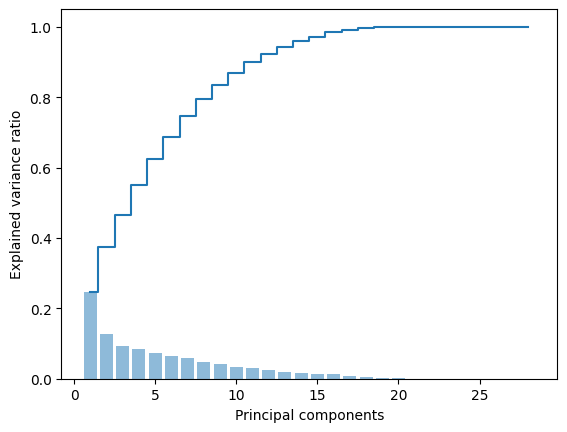

In [43]:
plt.bar(range(1, 29), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 29), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

Visualitzar la PCA amb els dos primers components principals

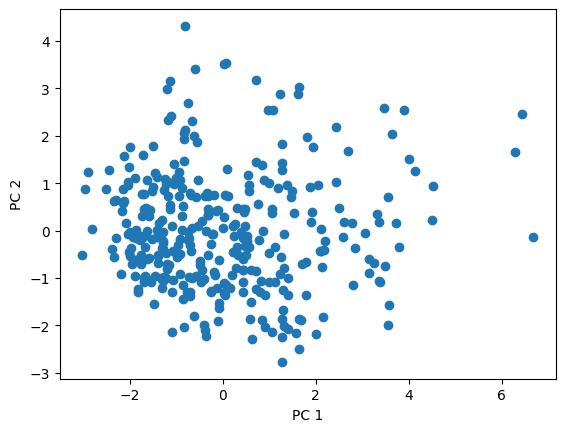

In [44]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_imp_enc_std)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

## SECCIÓ 3

Els canvis per obtenir les versions cocrresponents es relalitzen directament en el codi

### KNN

Crear el pipeline

In [45]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.compose import make_column_transformer
from imblearn.combine import SMOTETomek
from imblearn.pipeline import make_pipeline as make_pipeline_with_sampler

num_pipe = make_pipeline(
    KNNImputer(n_neighbors=3), StandardScaler()
)

cat_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore"),
)

preprocessor_linear = make_column_transformer(
    (num_pipe, selector(dtype_include="number")),
    (cat_pipe, selector(dtype_include=("category","object"))),
    n_jobs=2,
)

pca_pipe = make_pipeline(
    preprocessor_linear,
    PCA(n_components=0.8)  
)


#### Versió 1

Preprocessament i GridSearchCV

In [46]:
d1 = df.copy()

#Eliminar les variables decidides anteriorment
var_to_drop = ['Cholesterol','Tryglicerides','ID','Drug']
for var in var_to_drop:
    d1 = d1.drop(var,axis=1)
d1["Stage"] = d1["Stage"].astype(str)

#Eliminar outliers
def remove_outliers(df, col, threshold=1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] >= Q1 - threshold * IQR) & (df[col] <= Q3 + threshold * IQR)]

#for col in num_features2:
#   d1 = remove_outliers(d1,col,3)

#Particionat de dades
X = d1.loc[:, d1.columns != 'Status']
y = d1["Status"]

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, 
                     stratify=y,
                     random_state=0)

d1.shape

(418, 16)

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

params = {'n_neighbors': [1, 2, 3, 4, 5], #petita degut a la dimensió de la base de dades
          'weights': ['uniform', 'distance'],
          'p': [1,2]}

grid = GridSearchCV(KNeighborsClassifier(),
                    param_grid=params,
                    scoring = 'balanced_accuracy',
                    refit = True,
                    cv=10,
                    n_jobs=-1,
                    error_score = 'raise'
                    )

knn1 = make_pipeline(pca_pipe,grid)
knn1.fit(X_train, y_train)
grid.best_estimator_

KNeighborsClassifier(p=1, weights='distance')

In [48]:
grid.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

Fer la cross_validation amb els paràmetres donats

In [49]:
scoring = ["f1_weighted", "balanced_accuracy"]
knn_scores = {"Hiperparàmetres": [], "F1 weighted": [], "Balanced accuracy": []}
knn_index = []

In [50]:
from sklearn.model_selection import cross_validate

knn1 = make_pipeline(preprocessor_linear, KNeighborsClassifier(n_neighbors=4, p=1, weights='distance'))

knn_index += ["KNN"]
cv_result = cross_validate(knn1, X_train, y_train, scoring=scoring)

knn_scores["Hiperparàmetres"].append("{'n_neighbors': 4, 'p': 1, 'weights': 'distance'}")
knn_scores["F1 weighted"].append(cv_result["test_f1_weighted"].mean())
knn_scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

In [51]:
KNN_scores = pd.DataFrame(knn_scores, index=knn_index)
KNN_scores

,Hiperparàmetres,F1 weighted,Balanced accuracy
KNN,"{'n_neighbors': 4, 'p': 1, 'weights': 'distance'}",0.68409,0.525792


Entrenament amb train

In [52]:
from sklearn.metrics import balanced_accuracy_score,ConfusionMatrixDisplay

knn1.fit(X_train,y_train)
y_pred = knn1.predict(X_train)
balanced_accuracy_score(y_train, y_pred)

1.0

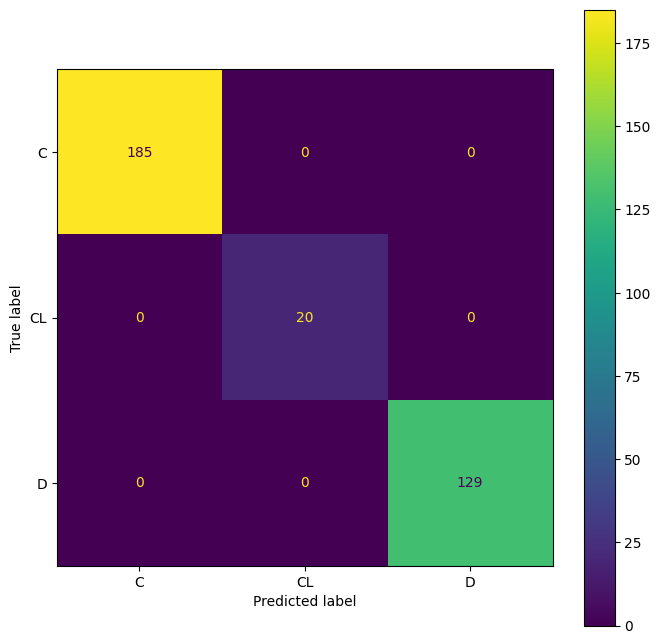

In [53]:
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(knn1, X_train,y_train, ax=plt.subplot());

### Decision Trees

In [54]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.compose import make_column_transformer
from imblearn.combine import SMOTETomek
from imblearn.pipeline import make_pipeline as make_pipeline_with_sampler

num_pipe = make_pipeline(
    KNNImputer(n_neighbors=3), StandardScaler()
)

cat_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),
)

preprocessor_linear = make_column_transformer(
    (num_pipe, selector(dtype_include="number")),
    (cat_pipe, selector(dtype_include=("category","object"))),
    n_jobs=2,
)


In [55]:
preprocessor_linear

ColumnTransformer(n_jobs=2,
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('knnimputer',
                                                  KNNImputer(n_neighbors=3)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x1392ac290>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x139452410>)])

In [56]:
d2 = df.copy()

#Eliminar les variables decidides anteriorment
var_to_drop = ['Cholesterol','Tryglicerides','ID','Drug']
for var in var_to_drop:
    d2 = d2.drop(var,axis=1)
d2["Stage"] = d2["Stage"].astype(str)

for col in num_features2: 
    if col in d2.columns:
        d2[col] = d2[col].astype(float)
for col in cat_features2: 
    if col in d2.columns:
        d2[col] = d2[col].astype(str)


#Eliminar outliers
def remove_outliers(df, col, threshold=1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] >= Q1 - threshold * IQR) & (df[col] <= Q3 + threshold * IQR)]

for col in num_features2:
   d2 = remove_outliers(d2,col,3)

#Particionat de dades
X = d2.loc[:, d2.columns != 'Status']
y = d2["Status"]

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, 
                     stratify=y,
                     random_state=0)

d2.shape

(251, 16)

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'criterion': ['gini', 'entropy', 'log_loss'], 
          'max_depth':[2,3,4,5,6],
          'ccp_alpha': [0.005,0.01,0.015,0.02,0.025,0.03,0.04,0.08,0.1,0.15,0.18,0.2,0.25,0.3,0.35,0.4,0.5,0.6,0.7,0.8,0.9,1]
          }

grid = GridSearchCV(DecisionTreeClassifier(),
                    param_grid=params,
                    scoring = 'balanced_accuracy',
                    refit = True,
                    cv=10,
                    n_jobs=-1,
                    error_score = 'raise'
                    )

dt1 = make_pipeline(preprocessor_linear,grid)
dt1.fit(X_train, y_train)
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=6)

In [58]:
grid.best_params_

{'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 6}

In [59]:
scoring = ["f1_weighted", "balanced_accuracy"]
dt_scores = {"Hiperparàmetres": [], "F1 weighted": [], "Balanced accuracy": []}
dt_index = []

In [60]:
from sklearn.model_selection import cross_validate

dt1 = make_pipeline(preprocessor_linear, DecisionTreeClassifier(ccp_alpha=0.025, criterion='entropy', max_depth=6,class_weight="balanced"))

dt_index += ["DT + class_weight + Threshold 3"]
cv_result = cross_validate(dt1, X_train, y_train, scoring=scoring)

dt_scores["Hiperparàmetres"].append("{'ccp_alpha': 0.025, 'criterion': 'entropy', 'max_depth': 6}")
dt_scores["F1 weighted"].append(cv_result["test_f1_weighted"].mean())
dt_scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

In [61]:
dt_scores = pd.DataFrame(dt_scores, index=dt_index)
dt_scores

,Hiperparàmetres,F1 weighted,Balanced accuracy
DT + class_weight + Threshold 3,"{'ccp_alpha': 0.025, 'criterion': 'entropy', '...",0.685084,0.581532


In [62]:
from sklearn.metrics import balanced_accuracy_score,ConfusionMatrixDisplay

dt1.fit(X_train,y_train)
y_pred = dt1.predict(X_train)
balanced_accuracy_score(y_train, y_pred)

0.8507575757575757

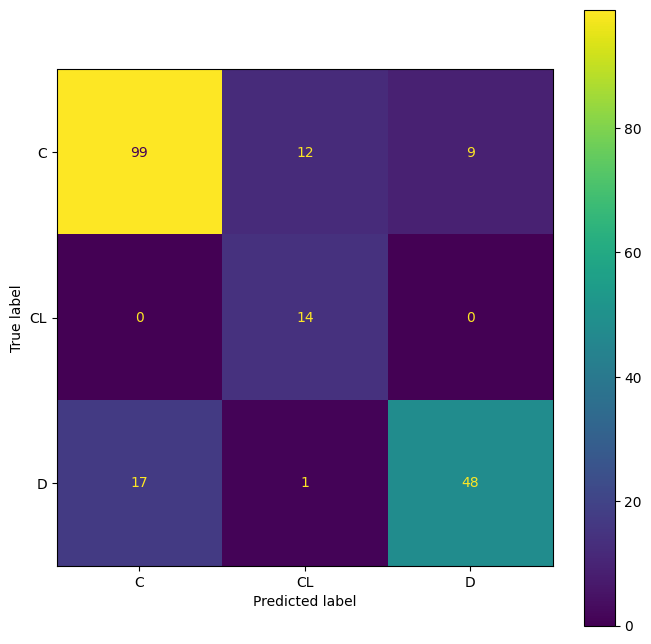

In [63]:
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(dt1, X_train,y_train, ax=plt.subplot());

### SVM

In [64]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.compose import make_column_transformer
from imblearn.combine import SMOTETomek
from imblearn.pipeline import make_pipeline as make_pipeline_with_sampler

num_pipe = make_pipeline(
    KNNImputer(n_neighbors=3), StandardScaler()
)

cat_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore"),
)

preprocessor_linear = make_column_transformer(
    (num_pipe, selector(dtype_include="number")),
    (cat_pipe, selector(dtype_include=("category","object"))),
    n_jobs=2,
)

In [65]:
d3 = df.copy()

#Eliminar les variables decidides anteriorment
var_to_drop = ['Cholesterol','Tryglicerides','ID','Drug']
for var in var_to_drop:
    d3 = d3.drop(var,axis=1)
d3["Stage"] = d3["Stage"].astype(str)

for col in num_features2: 
    if col in d3.columns:
        d3[col] = d3[col].astype(float)
for col in cat_features2: 
    if col in d3.columns:
        d3[col] = d3[col].astype(str)


#Eliminar outliers
def remove_outliers(df, col, threshold=1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] >= Q1 - threshold * IQR) & (df[col] <= Q3 + threshold * IQR)]

for col in num_features2:
   d3 = remove_outliers(d3,col,3)

#Particionat de dades
X = d3.loc[:, d3.columns != 'Status']
y = d3["Status"]

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, 
                     stratify=y,
                     random_state=0)

d3.shape

(251, 16)

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

params = {'C': [0.01,0.1,1,2,3,4,5,10],
          'kernel':['linear', 'rbf', 'sigmoid'],
          'gamma': ['scale', 'auto']
          }

grid = GridSearchCV(SVC(),
                    param_grid=params,
                    scoring = 'balanced_accuracy',
                    refit = True,
                    cv=10,
                    n_jobs=-1,
                    error_score = 'raise'
                    )

dt1 = make_pipeline(preprocessor_linear,grid)
dt1.fit(X_train, y_train)
grid.best_estimator_

SVC(C=3, kernel='linear')

In [67]:
grid.best_params_

{'C': 3, 'gamma': 'scale', 'kernel': 'linear'}

In [68]:
scoring = ["f1_weighted", "balanced_accuracy"]
dt_scores = {"Hiperparàmetres": [], "F1 weighted": [], "Balanced accuracy": []}
dt_index = []

In [69]:
from sklearn.model_selection import cross_validate

dt1 = make_pipeline(preprocessor_linear, SVC(C=3, kernel='linear',class_weight="balanced",random_state=0))

dt_index += ["SVC + class weight + Threshold 3"]
cv_result = cross_validate(dt1, X_train, y_train, scoring=scoring)

dt_scores["Hiperparàmetres"].append("{'C': 3, 'gamma': 'scale', 'kernel': 'linear'}")
dt_scores["F1 weighted"].append(cv_result["test_f1_weighted"].mean())
dt_scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

In [70]:
dt_scores = pd.DataFrame(dt_scores, index=dt_index)
dt_scores

,Hiperparàmetres,F1 weighted,Balanced accuracy
SVC + class weight + Threshold 3,"{'C': 3, 'gamma': 'scale', 'kernel': 'linear'}",0.638251,0.503816


In [71]:
from sklearn.metrics import balanced_accuracy_score,ConfusionMatrixDisplay

dt1.fit(X_train,y_train)
y_pred = dt1.predict(X_train)
balanced_accuracy_score(y_train, y_pred)

0.8325757575757576

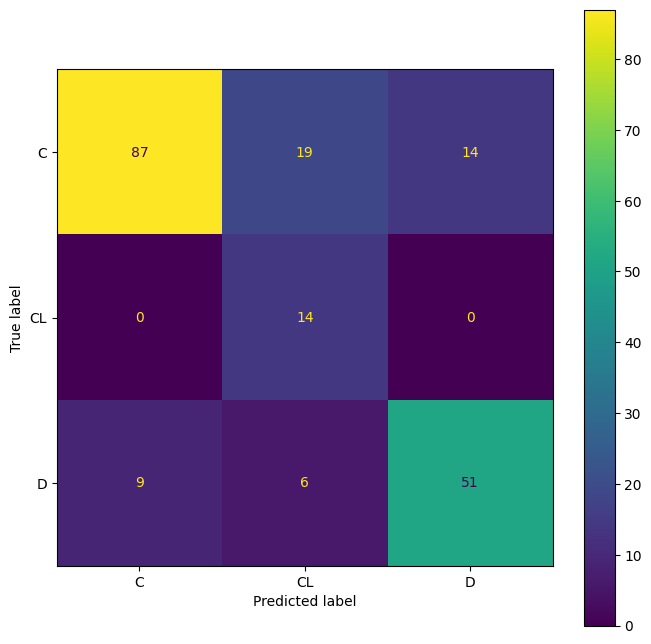

In [72]:
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(dt1, X_train,y_train, ax=plt.subplot());

## SECCIÓ 4

In [73]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.compose import make_column_transformer
from imblearn.combine import SMOTETomek
from imblearn.pipeline import make_pipeline as make_pipeline_with_sampler

num_pipe = make_pipeline(
    KNNImputer(n_neighbors=3), StandardScaler()
)

cat_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore"),
)

preprocessor_linear = make_column_transformer(
    (num_pipe, selector(dtype_include="number")),
    (cat_pipe, selector(dtype_include=("category","object"))),
    n_jobs=2,
)

In [74]:
d3 = df.copy()

#Eliminar les variables decidides anteriorment
var_to_drop = ['Cholesterol','Tryglicerides','ID','Drug']
for var in var_to_drop:
    d3 = d3.drop(var,axis=1)
d3["Stage"] = d3["Stage"].astype(str)

for col in num_features2: 
    if col in d3.columns:
        d3[col] = d3[col].astype(float)
for col in cat_features2: 
    if col in d3.columns:
        d3[col] = d3[col].astype(str)


#Eliminar outliers
def remove_outliers(df, col, threshold=1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] >= Q1 - threshold * IQR) & (df[col] <= Q3 + threshold * IQR)]

for col in num_features2:
   d3 = remove_outliers(d3,col,3)

#Particionat de dades
X = d3.loc[:, d3.columns != 'Status']
y = d3["Status"]

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, 
                     stratify=y,
                     random_state=0)

d3.shape

(251, 16)

In [75]:
from sklearn.metrics import balanced_accuracy_score,ConfusionMatrixDisplay, f1_score

scoring = ["f1_weighted", "balanced_accuracy"]
dt_scores = {"Hiperparàmetres": [], "F1 weighted VAL": [], "Balanced accuracy VAL": [],"F1 weighted TRAIN": [], "Balanced accuracy TRAIN": [],"F1 weighted TEST": [], "Balanced accuracy TEST": []}
dt_index = []

svm = make_pipeline(preprocessor_linear, SVC(C=3, kernel='linear',random_state=0))
dt_index += ["SVC + Threshold 3"]
cv_result = cross_validate(svm, X_train, y_train, scoring=scoring)
dt_scores["Hiperparàmetres"].append("{'C': 3, 'gamma': 'scale', 'kernel': 'linear'}")
dt_scores["F1 weighted VAL"].append(cv_result["test_f1_weighted"].mean())
dt_scores["Balanced accuracy VAL"].append(cv_result["test_balanced_accuracy"].mean())

svm.fit(X_train,y_train)
y_pred = svm.predict(X_train)
dt_scores["Balanced accuracy TRAIN"].append(balanced_accuracy_score(y_train, y_pred))
dt_scores["F1 weighted TRAIN"].append(f1_score(y_train, y_pred, average='weighted'))

dt_scores["Balanced accuracy TEST"].append(balanced_accuracy_score(y_test, svm.predict(X_test)))
dt_scores["F1 weighted TEST"].append(f1_score(y_test, svm.predict(X_test), average='weighted'))


dt_scores = pd.DataFrame(dt_scores, index=dt_index)
dt_scores

,Hiperparàmetres,F1 weighted VAL,Balanced accuracy VAL,F1 weighted TRAIN,Balanced accuracy TRAIN,F1 weighted TEST,Balanced accuracy TEST
SVC + Threshold 3,"{'C': 3, 'gamma': 'scale', 'kernel': 'linear'}",0.705483,0.556258,0.794445,0.64044,0.842829,0.749673


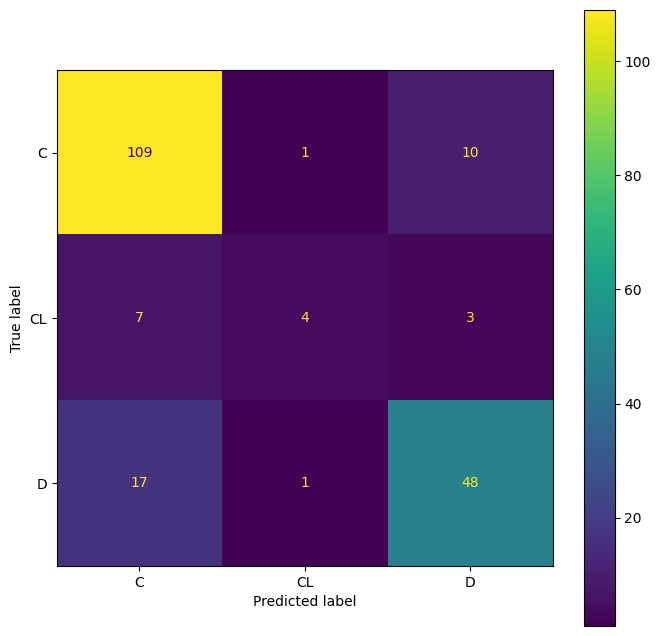

In [76]:
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(svm, X_train,y_train, ax=plt.subplot());

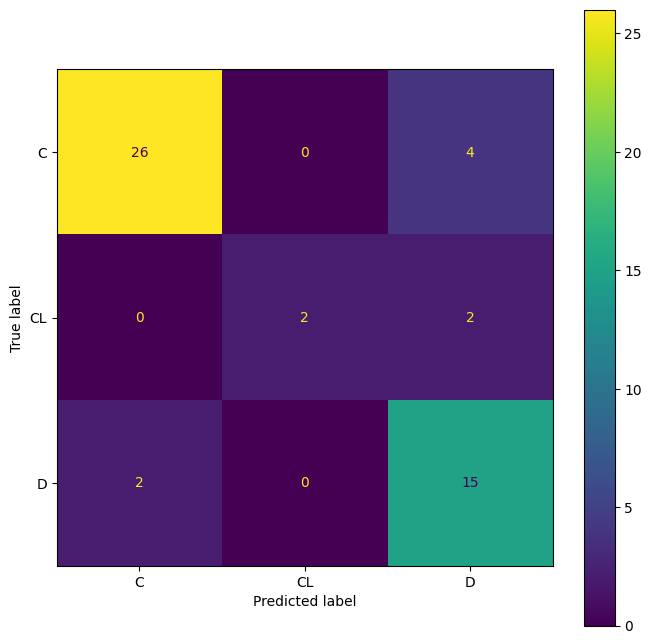

In [77]:
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(svm, X_test,y_test, ax=plt.subplot());